# Project Name: PFA Housing Project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('housing_train.csv')
df_test=pd.read_csv('housing_test.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [5]:
df.shape

(1168, 81)

In [6]:
df_test.shape

(292, 80)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [9]:
df.isnull().sum().any()

True

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

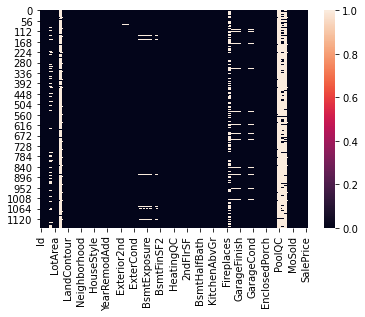

In [11]:
sns.heatmap(df.isnull())

In [12]:
df_test.isnull().sum().any()

True

In [13]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

<AxesSubplot:>

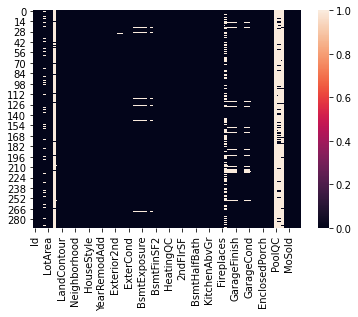

In [14]:
sns.heatmap(df_test.isnull())

As we can see there are missing values present in both the datasets.

### Working with train dataset

In [16]:
# Making the index as ID
df=df.set_index('Id')
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
127         120       RL          NaN     4928   Pave   NaN      IR1   
889          20       RL         95.0    15865   Pave   NaN      IR1   
793          60       RL         92.0     9920   Pave   NaN      IR1   
110          20       RL        105.0    11751   Pave   NaN      IR1   
422          20       RL          NaN    16635   Pave   NaN      IR1   

    LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                   ...                                      
127         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
889         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
793         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
110         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
422         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                              
127       0      2    2007        WD         Normal     128000  
889       0     10    2007        WD         Normal     268000  
793       0      6    2007        WD         Normal     269790  
110       0      1    2010       COD         Normal     190000  
422       0      6    2009        WD         Normal     215000  

[5 rows x 80 columns]

In [17]:
#Printing the numeric columns and categorical columns with their unique values
print('Columns with unique values of datatype object')
for column in df.columns:
    if df[column].dtypes == 'object':
        print(str(column)+ ' : ' +str(df[column].nunique()))
print('======================================================\n')        
print('Columns with unique values of datatype Float64')
for column in df.columns:
    if df[column].dtypes == 'float64':
        print(str(column)+ ' : ' +str(df[column].nunique()))
print('======================================================\n')
print('Columns with unique values of datatype Int64')
for column in df.columns:
    if df[column].dtypes == 'int64':
        print(str(column)+ ' : ' +str(df[column].nunique()))

Columns with unique values of datatype object
MSZoning : 5
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 1
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 14
Exterior2nd : 15
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
PoolQC : 3
Fence : 4
MiscFeature : 4
SaleType : 9
SaleCondition : 6

Columns with unique values of datatype Float64
LotFrontage : 106
MasVnrArea : 283
GarageYrBlt : 97

Columns with unique values of datatype Int64
MSSubClass : 15
LotArea : 892
OverallQual : 10
OverallCond : 9
YearBuilt : 110
YearRemodAdd : 61
BsmtFinSF1 : 551
BsmtFinSF2 : 122
BsmtUnfSF : 681
TotalBsmtSF : 636
1stFlrSF : 669
2nd

#### Treating Missing Values

The columns Alley, PoolQC, MiscFeature, FireplaceQu, Fence have extremely sparse data with and very high percentage of null values. Hence, we are dropping these columns from both the datasets.

In [18]:
# Displaying the columns having null values
null_values=df.isnull().sum()
null_values=null_values[null_values>0]

# Displaying the columns having null values in percentage format
null_percent = null_values * 100 / df.shape[0]

# Concatenating the number and perecentage of missing values into one dataframe and sorting it in Descending order
pd.concat([null_values,null_percent], axis=1,keys=['Null Values', 'Null Percentage']).sort_values(by="Null Values",ascending=False)

Null Values  Null Percentage
PoolQC               1161        99.400685
MiscFeature          1124        96.232877
Alley                1091        93.407534
Fence                 931        79.708904
FireplaceQu           551        47.174658
LotFrontage           214        18.321918
GarageType             64         5.479452
GarageYrBlt            64         5.479452
GarageFinish           64         5.479452
GarageQual             64         5.479452
GarageCond             64         5.479452
BsmtExposure           31         2.654110
BsmtFinType2           31         2.654110
BsmtCond               30         2.568493
BsmtFinType1           30         2.568493
BsmtQual               30         2.568493
MasVnrArea              7         0.599315
MasVnrType              7         0.599315

From the above, following columns has maximum null values:
1. PoolQC
2. MiscFeature 
3. Alley
4. Fence
5. FireplaceQu

In [19]:
df["PoolArea"].value_counts()

0      1161
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [20]:
df["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [21]:
df["PoolQC"].fillna("No Pool", inplace=True)

In [22]:
df["PoolQC"].value_counts()

No Pool    1161
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In [23]:
df["MiscVal"].value_counts()

0        1126
400        10
500         7
2000        4
700         3
600         3
1200        2
350         1
450         1
2500        1
480         1
8300        1
560         1
54          1
620         1
800         1
1150        1
15500       1
1300        1
1400        1
Name: MiscVal, dtype: int64

In [24]:
df["MiscFeature"].value_counts()

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

In [25]:
# Replacing null values in MiscFeature with No Feature
df['MiscFeature'].fillna('No feature', inplace=True)

df['Alley'].fillna('No Alley', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)
df['LotFrontage'].fillna(0, inplace=True)

In [26]:
# Replacing null values of numerical values with their mean of the respective columns
for column in df.columns:
    if df[column].dtypes == 'float64':
            df[column]=df[column].fillna(df[column].mean())
            
            
# Replacing null values of object datatypes their mode of the respective columns
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column]=df[column].fillna(df[column].mode()[0])

In [27]:
df.isnull().sum().any()

False

Hence, we removed all the null values from the train dataset.

In [28]:
df.shape

(1168, 80)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 127 to 617
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBui

#### Statistical Summary:

In [31]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage    1168.0      57.982021     35.471226      0.0      41.75   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1168.0     102.310078    182.047152      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1168.0    1978.193841     24.198559   1900.0    1962.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                         50%        75%       max  
MSSubClass         50.000000      70.00     190.0  
LotFrontage        64.000000      79.25     313.0  
LotArea          9522.500000   11515.50  164660.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1972.000000    2000.00    2010.0  
YearRemodAdd     1993.000000    2004.00    2010.0  
MasVnrArea          0.000000     160.00    1600.0  
BsmtFinSF1        385.500000     714.50    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         474.000000     816.00    2336.0  
TotalBsmtSF      1005.500000    1291.50    6110.0  
1stFlrSF         1096.500000    1392.00    4692.0  
2ndFlrSF            0.000000     729.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1468.500000    1795.00    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
BsmtHalfBath        0.000000       0.00       2.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.00       2.0  
BedroomAbvGr        3.000000       3.00       8.0  
KitchenAbvGr        1.000000       1.00       3.0  
TotRmsA

#### Correlation:

In [32]:
df.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.194837 -0.124151     0.070462    -0.056978   
LotFrontage     -0.194837     1.000000  0.070442     0.181200    -0.043025   
LotArea         -0.124151     0.070442  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.181200  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.043025  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.042255  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.089199  0.027228     0.555945     0.080669   
MasVnrArea       0.027813     0.127459  0.121086     0.407230    -0.137475   
BsmtFinSF1      -0.052236     0.088908  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403    -0.039761  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.150208  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.230927  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.231858  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.063712  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.031178 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.227812  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.003795  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.000221  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.112926  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.000295  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.140103  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506     0.027694 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.211464  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.051242  0.285983     0.390067    -0.013632   
GarageYrBlt      0.073130     0.046070 -0.034765     0.511482    -0.301881   
GarageCars      -0.027639     0.165034  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.211067  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.007974  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.083833  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.022484 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.006070  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.021007  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.123979  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.069039  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.017214  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.015062 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.210206  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.027813   -0.052236   -0.062403   
LotFrontage     0.042255      0.089199    0.127459    0.088908   -0.039761   
LotArea         0.005506      0.027228    0.121086    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.407230    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.137475   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.321905    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.181385    0.114430   -0.044694   
MasVnrArea      0.321905      0.181385    1.000000    0.265735   -0.065707   
BsmtFinSF1      0.227933      0.114430    0.265735    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.065707   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.109562   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.365016    0.518940    0.098167   
1stFlrSF        0.279450      0.2333

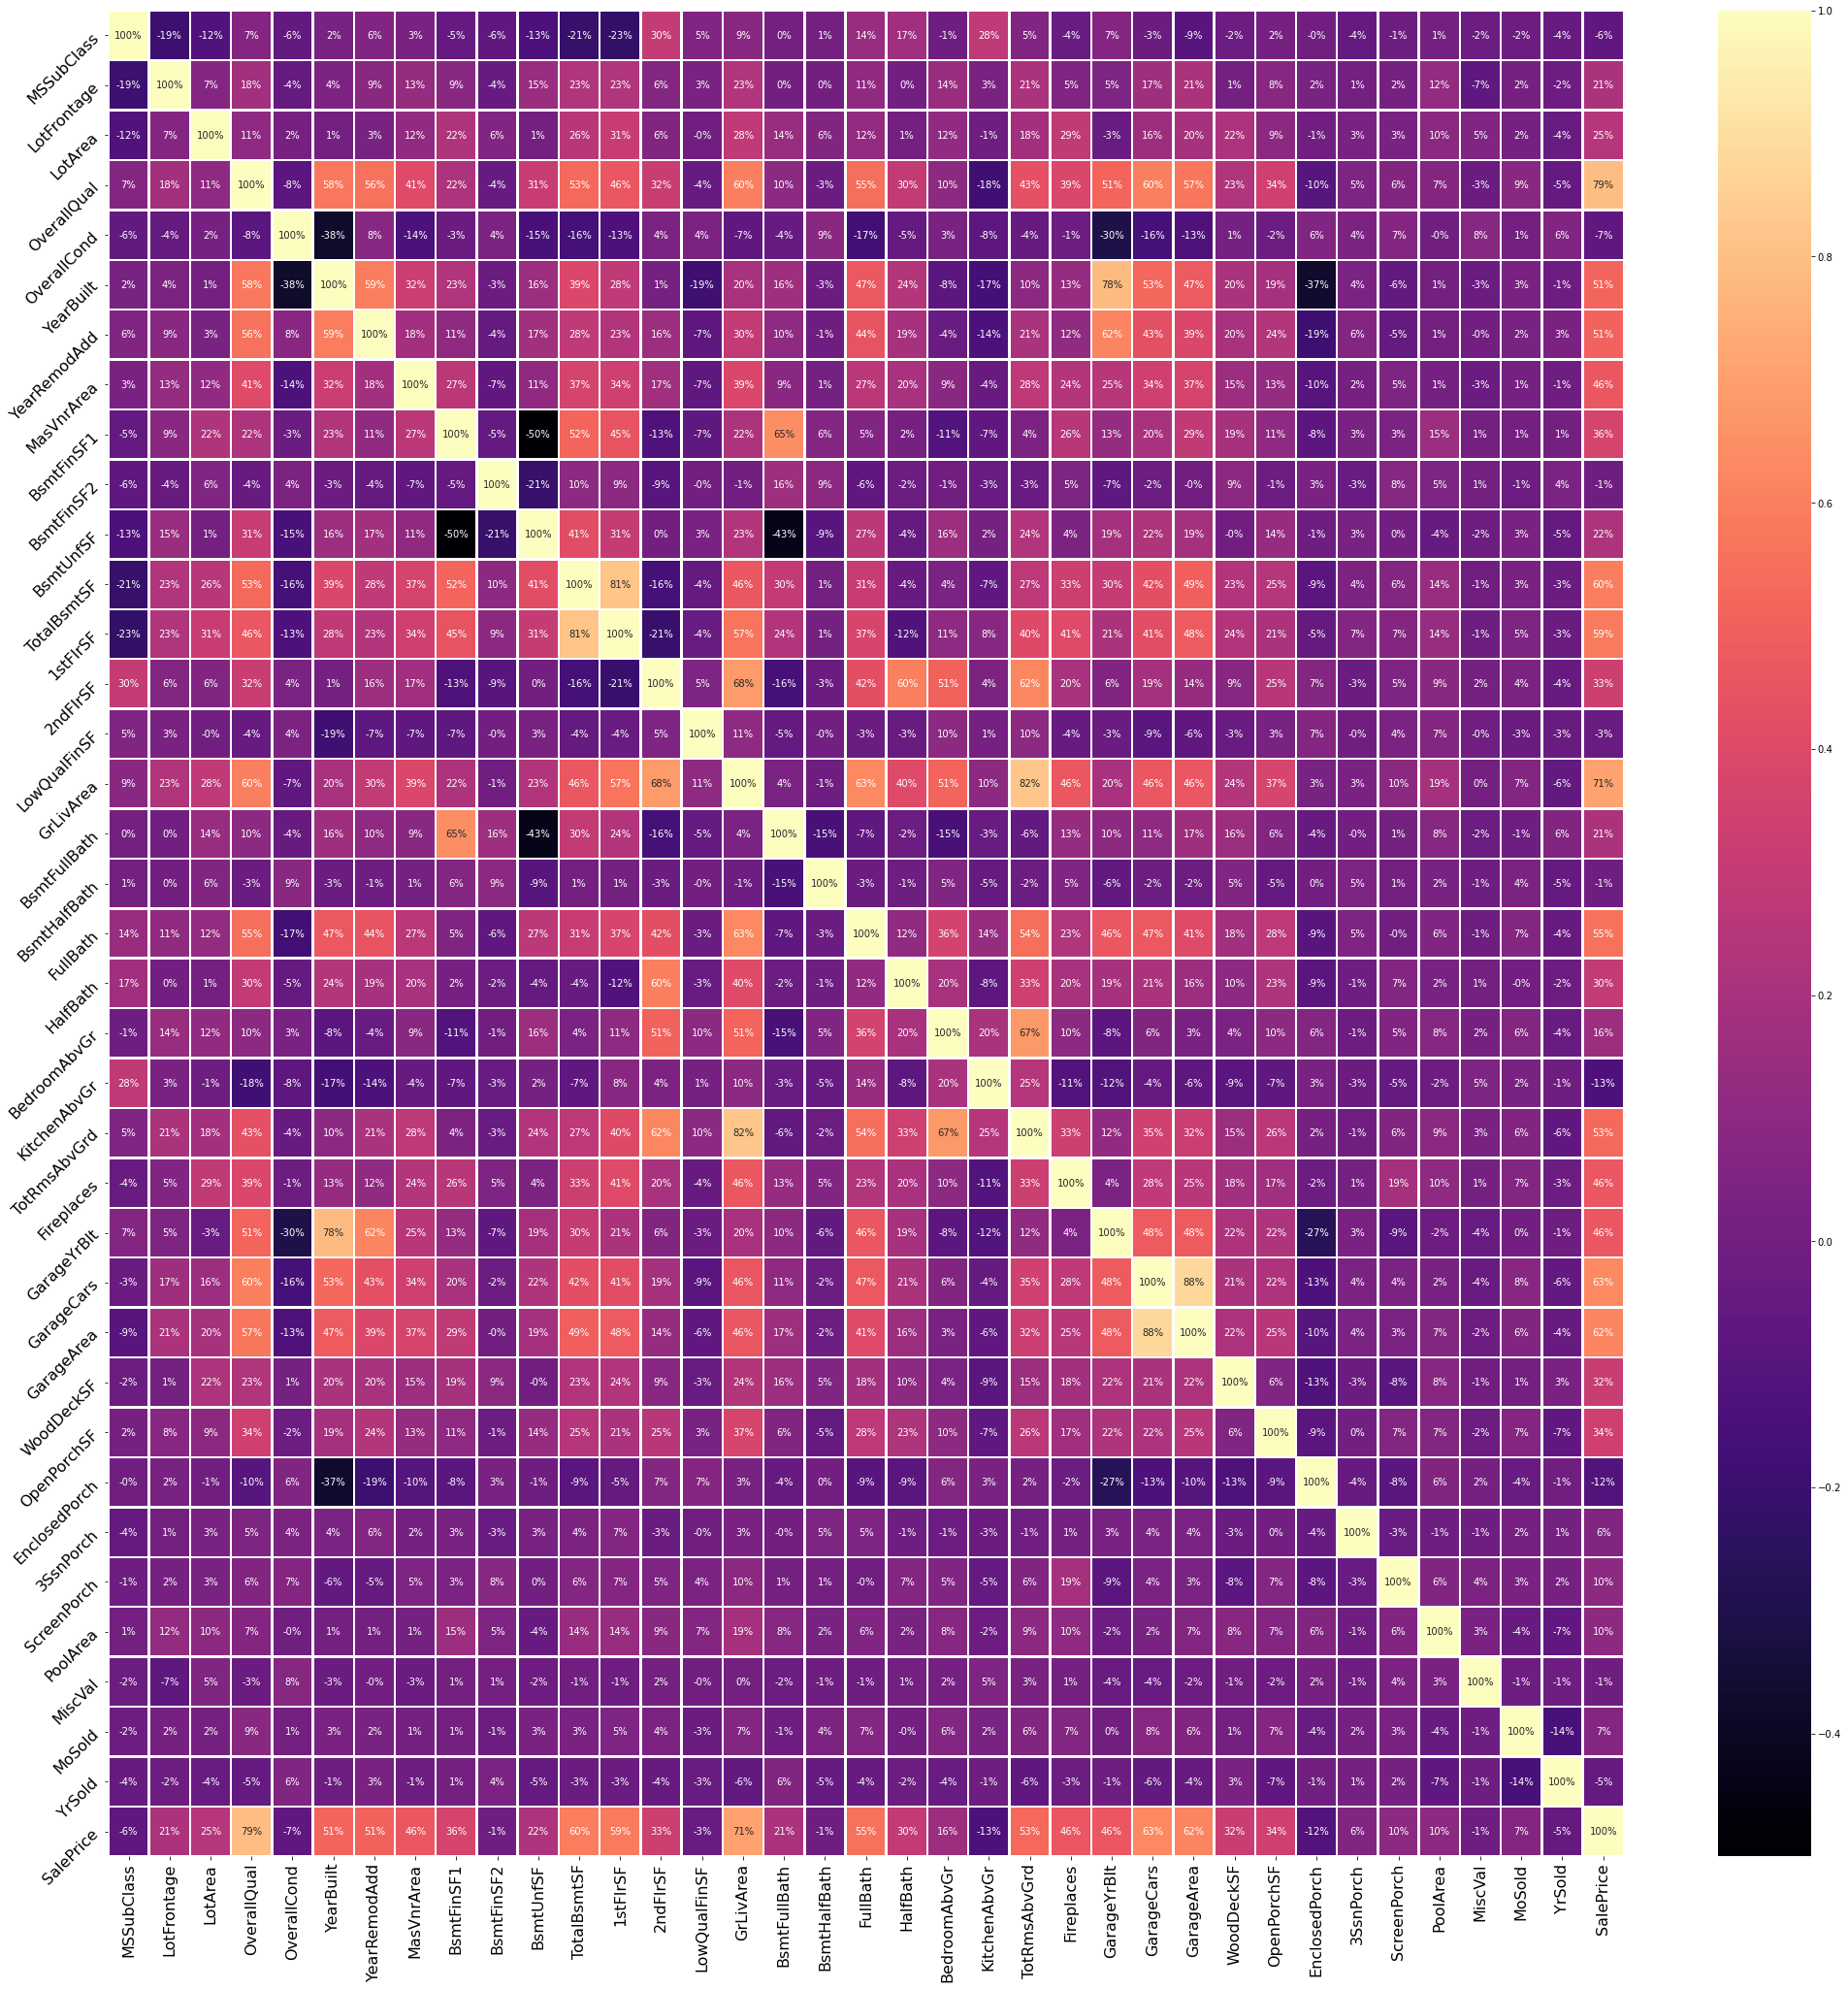

In [35]:
# Correlation using Heatmap
plt.figure(figsize=(35,35))
p = sns.heatmap(df.corr(), annot=True, lw=1.5, fmt='.0%', cmap='magma')
xlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':16}, rotation=90)
ylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':16}, rotation=45)

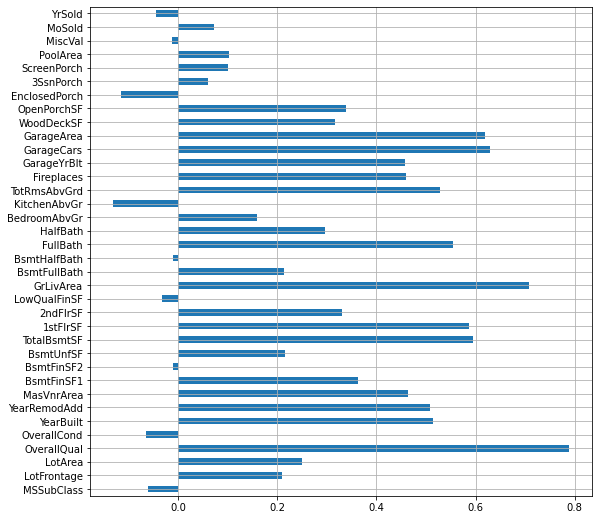

In [36]:
# Correlation using bar
plt.figure(figsize=(9,9))
df.drop('SalePrice',axis = 1).corrwith(df['SalePrice']).plot(kind='barh',grid=True);

### Exploratory Data Analysis

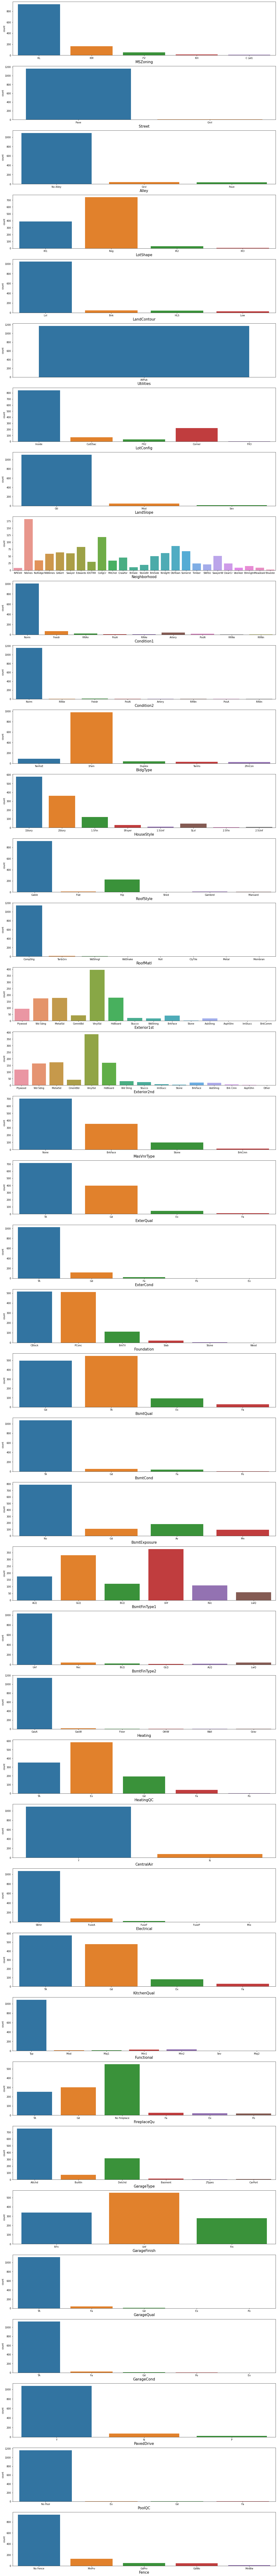

In [37]:
plt.figure(figsize=(20,200),facecolor='white')
plotnum=1
for col in df[df.columns[df.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(40,1,plotnum)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

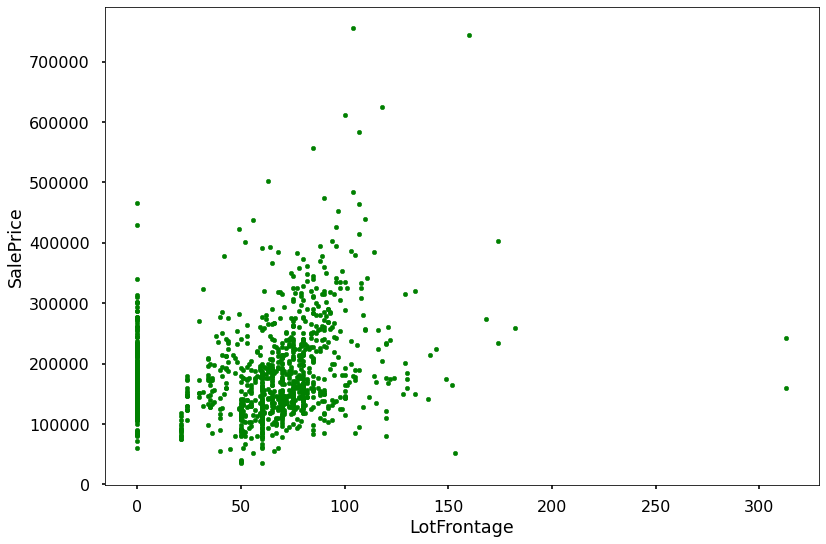

In [38]:
plt.style.use('seaborn-poster')
df.plot(kind='scatter', x='LotFrontage', y='SalePrice', color='g') 

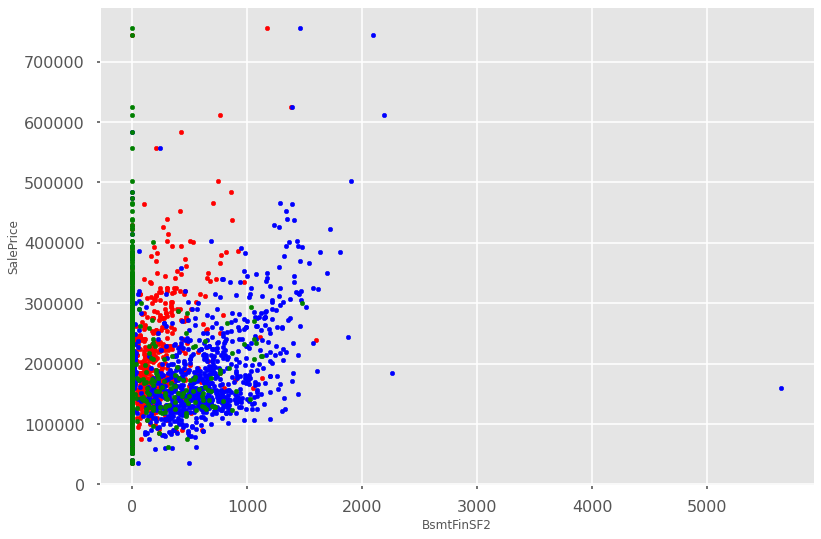

In [39]:
plt.style.use('ggplot')
ax1 = df.plot(kind='scatter', x='MasVnrArea', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', color='b', ax=ax1)
ax3 = df.plot(kind='scatter', x='BsmtFinSF2', y='SalePrice', color='g', ax=ax1)

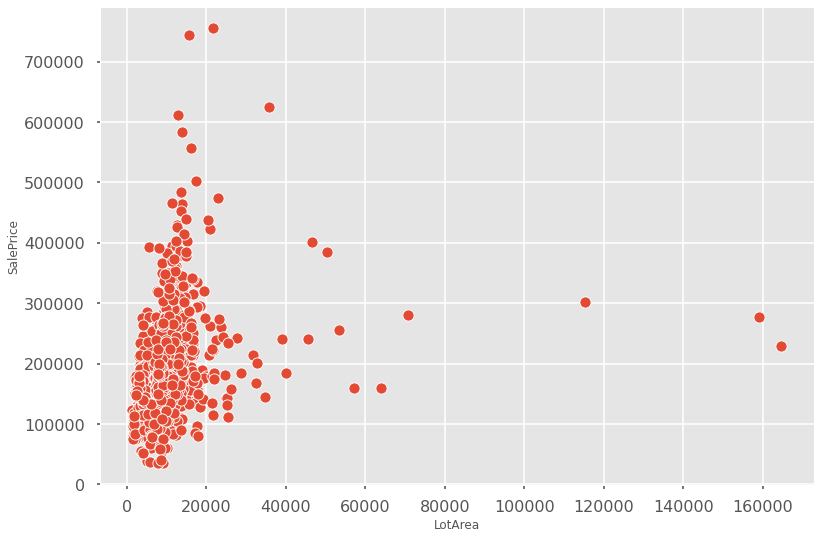

In [40]:
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = df)
plt.show()

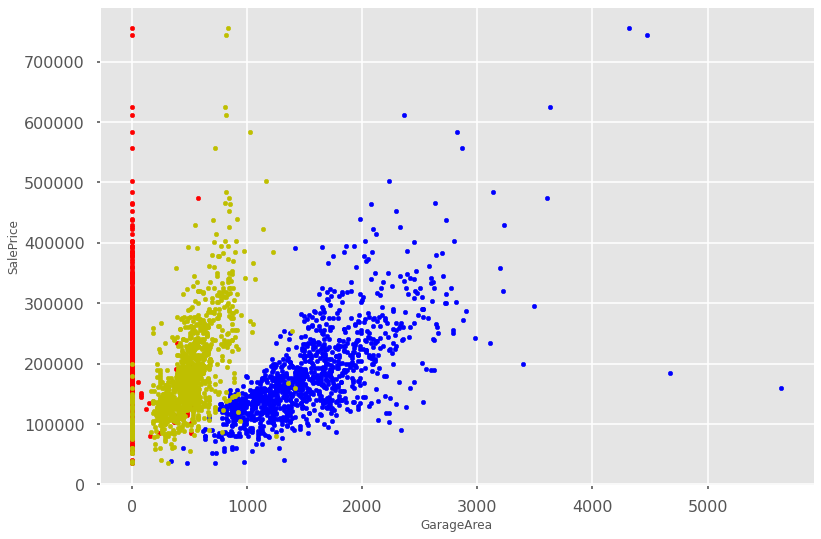

In [42]:
plt.style.use('seaborn-poster')
plt.style.use('ggplot')
ax1 = df.plot(kind='scatter', x='LowQualFinSF', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='GrLivArea', y='SalePrice', color='b', ax=ax1)
ax2 = df.plot(kind='scatter', x='GarageArea', y='SalePrice', color='y', ax=ax1)

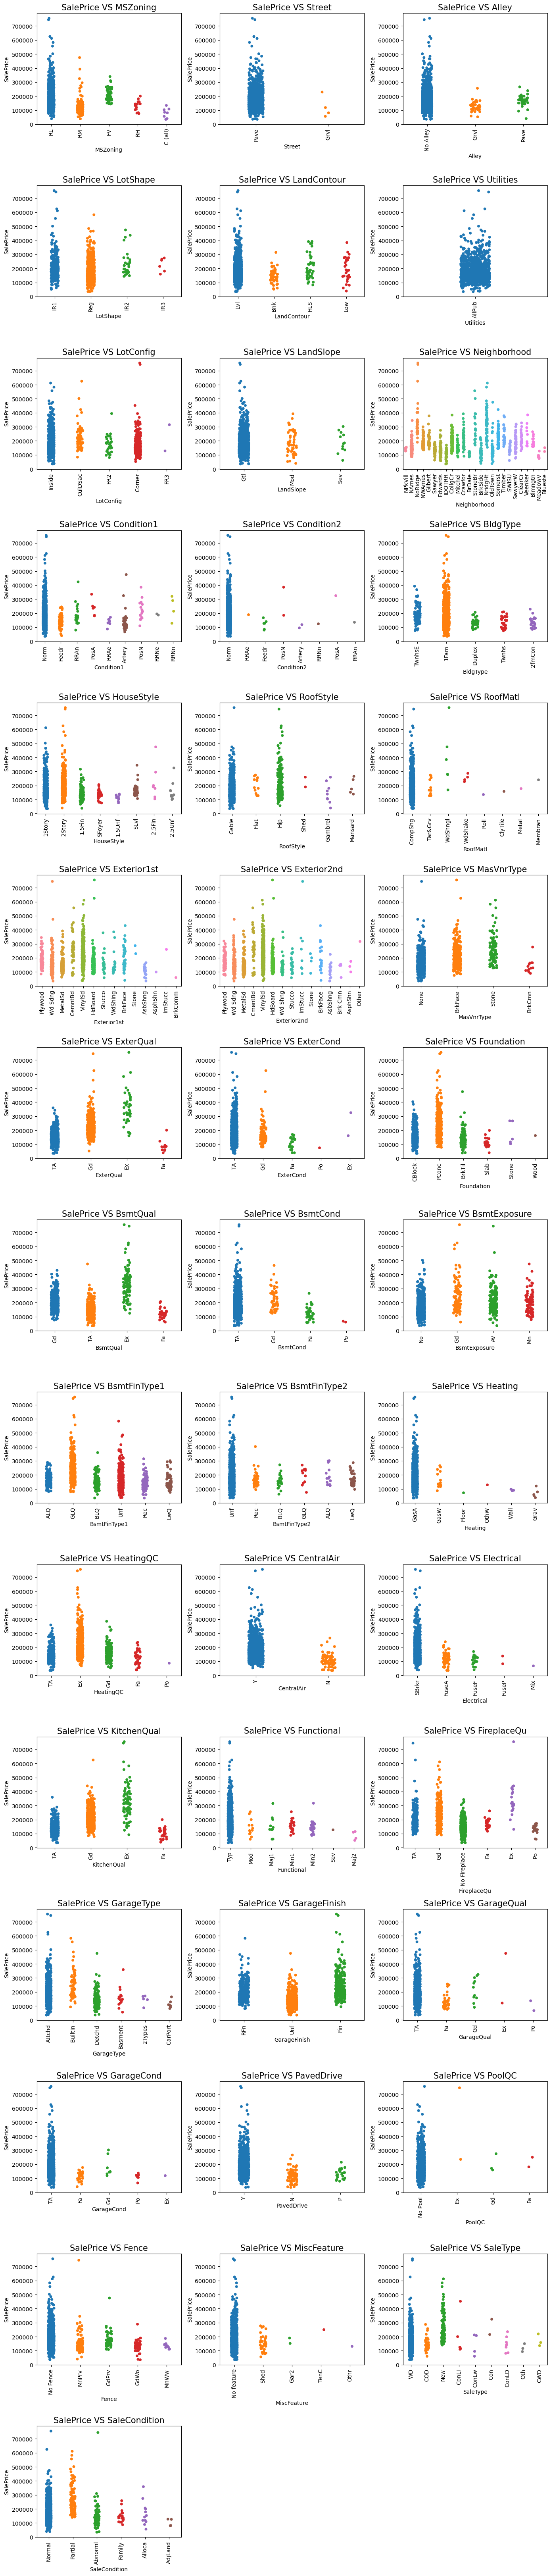

In [43]:
col1 = df.select_dtypes(exclude=[np.number]).columns
plt.style.use('default')
plt.figure(figsize=(14,65))
for i in range(len(col1)):
    plt.subplot(15,3,i+1)
    sns.stripplot(y=df['SalePrice'],x=df[col1[i]])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=15)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

1. Most of the houses belongs to Residential Low Density zone and many houses from this zone are having higher prices than other zones.
2. Almost all houses are having paved streets and few are having gravel streets.
3. More number of houses are having General shape of property slightly irregular or regular. Few of them are having irregular shape.
4. SalePrice vs LandContour plot shows most of the houses are nearly Flat/Leveled.
5. Nearly all houses has kind of utilities.
6. More number of lots are inside or at corners.
7. Most of the houses are having gentle slopes.
8. Houses with sever slopes are having slightly lower prices.
9. Houses located in Northridge are having more prices compared to other locations.
10. SalePrice vs Condition1 shows most number of houses bearing normal conditions.
11. SalePrice vs Condition2 shows most houses having normal conditions and very few with other conditions.
12. Most houses are Single-family detached and are having higher sale prices than other categories.
13. SalePrice vs HouseStyle shows the houses which are having style of dweling 1-story and 2-story are having higher prices than other types.
14. Many houses are having roof style with gable and hip. and very less number of houses are having shed.
15. many houses are having roof material as standard (Composite) Shingle and houses with roof material as Standard (Composite) Shingle and Wood Shingles are having higher prices.
16. Most houses are having Vinyl Siding as 1st and 2nd covering on the house and are also having higher prices, houses with hard board and cement shilding are also having higher prices.
17. The houses with foure Masonry veneer types that are , Brick Common, Brick Face,Cinder Block, Stone. Houses with Brick Common are having lower price.
18. The prices of houses are higher when material used for exterior are good or excellent.
19. Many houses are having cinder block and Poured Contrete foundation and very less houses are having wood foundations, houses with Poured Contrete foundations are having higher prices.
20. Basement quality is mostly average or good and the houses with excelent basement quality are having more prices.
21. Basement exposure is not strongly related to the sale price.
22. Most of the houses are having Heating type as Gas forced warm air furnace and Sale price of houses are higher whenever the quality of heating is excellent.
23. Most houses are having central air conditioning and are having more prices than that of houses which are without air conditioning.
24. Most of the houses with Standard Circuit Breakers & Romex electrical system and are having higher sale prices as well. Very less number of houses are with Mixed type of electrical systems.
25. Most houses are with good and average kitchen quality, houses are having higher prices when kitchen quality is excellent.
26. In vary rare cases fire place are prefabricated fireplace in basement and ben franklin Stove and these houses are having lower prices.
27. In most of the cases garage is attatched to the house only. The houses with attatched garage or Built-In the house prices are higher.
28. Many houses are having Sale type of Warranty Deed Conventional and just constructed and sold and are having higher prices.

#### Converting Categorical columns to Numerical columns:

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.columns:
    if df[column].dtypes == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [45]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                         
127         120         3          0.0     4928       1      1         0   
889          20         3         95.0    15865       1      1         0   
793          60         3         92.0     9920       1      1         0   
110          20         3        105.0    11751       1      1         0   
422          20         3          0.0    16635       1      1         0   

     LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
Id                                      ...                            
127            3          0          4  ...         0       3      4   
889            3          0          4  ...         0       3      4   
793            3          0          1  ...         0       3      4   
110            3          0          4  ...         0       3      2   
422            3          0          2  ...         0       3      4   

     MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                             
127            1        0       2    2007         8              4     128000  
889            1        0      10    2007         8              4     268000  
793            1        0       6    2007         8              4     269790  
110            1        0       1    2010         0              4     190000  
422            1        0       6    2009         8              4     215000  

[5 rows x 80 columns]

#### Outliers 

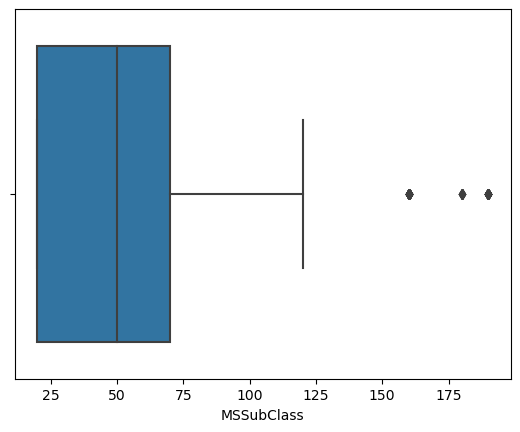

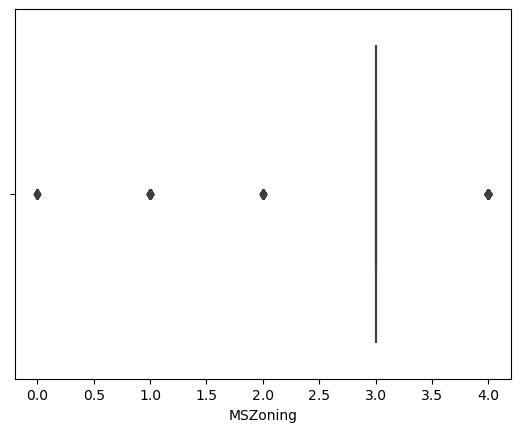

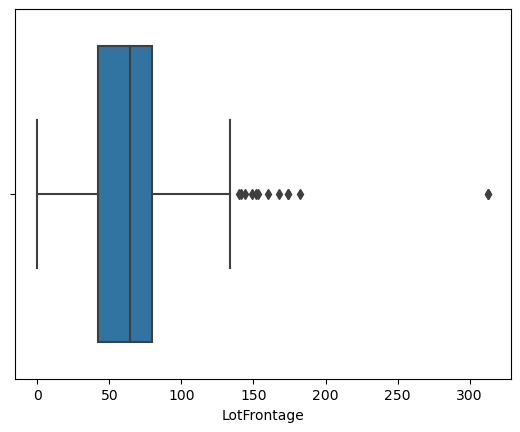

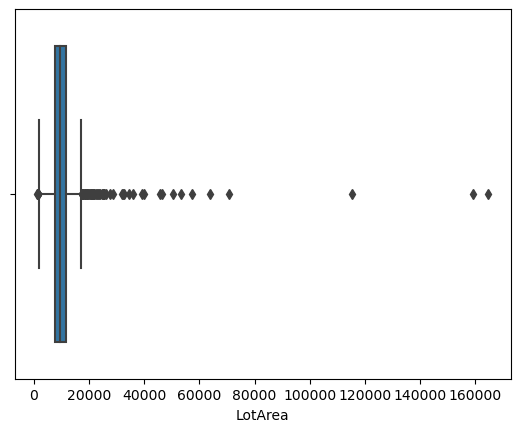

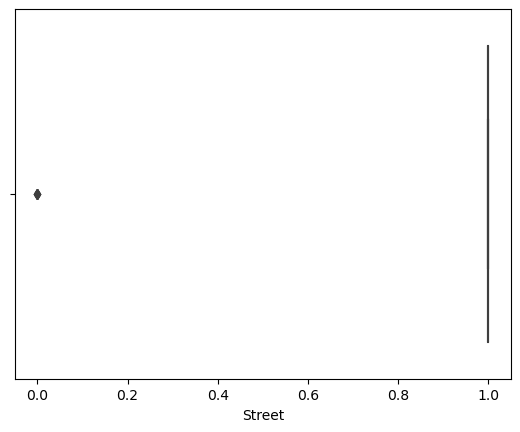

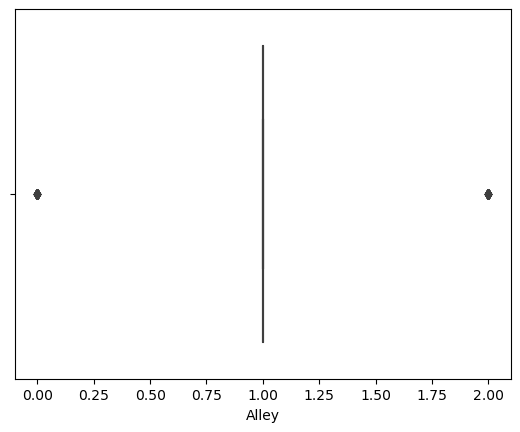

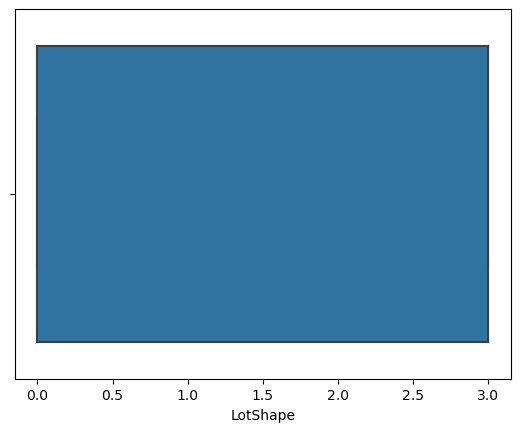

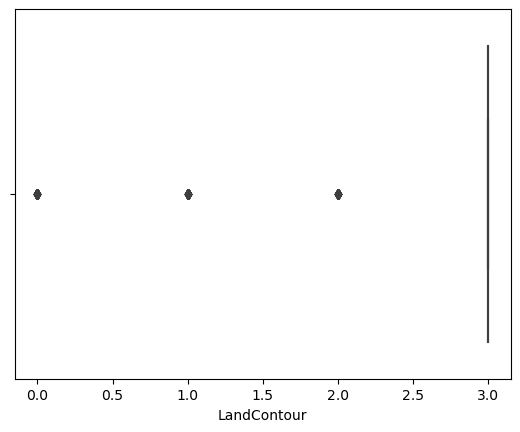

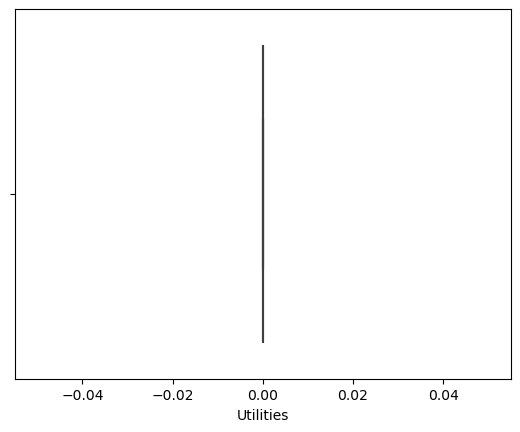

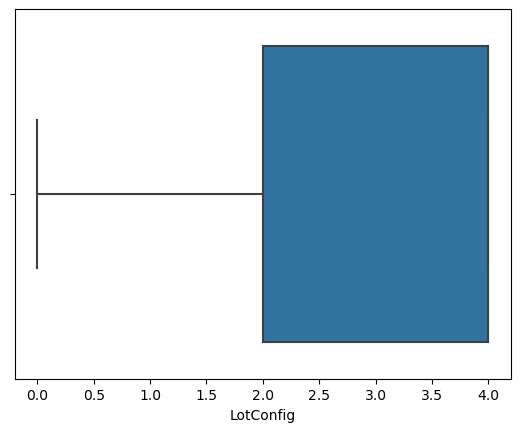

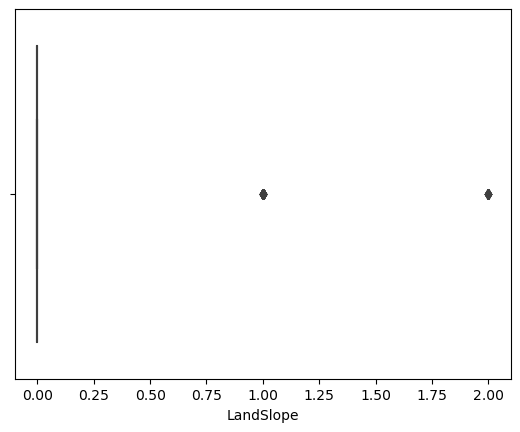

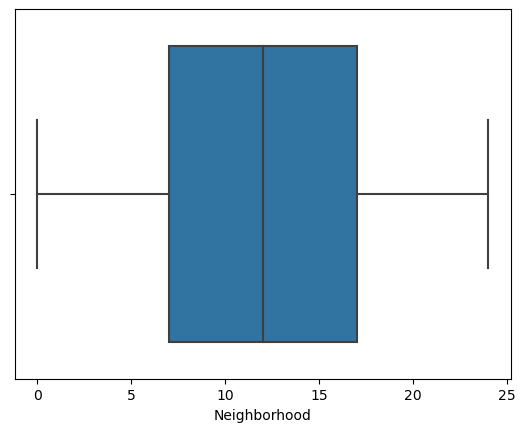

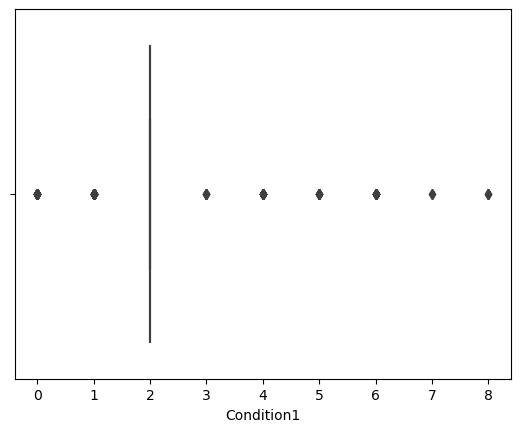

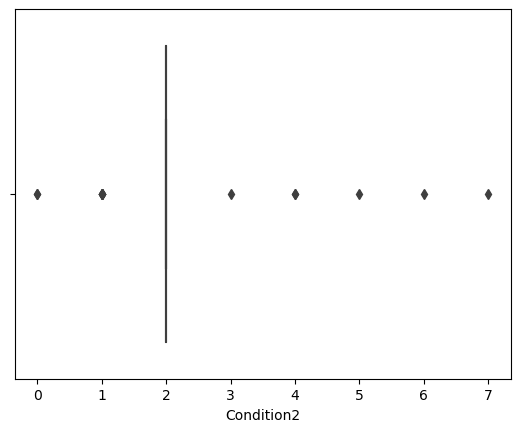

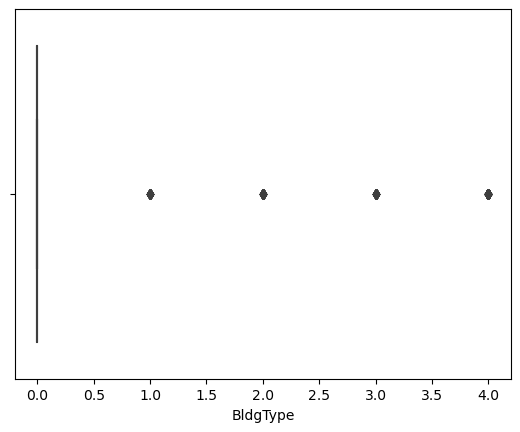

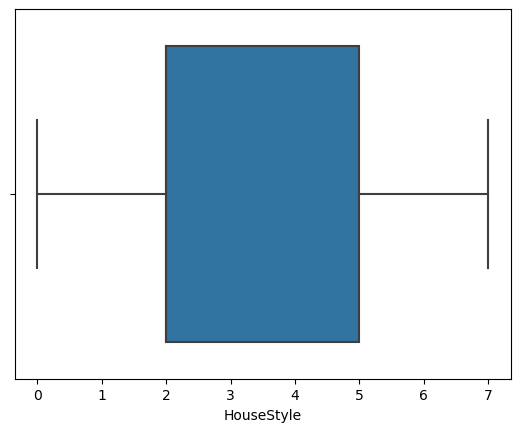

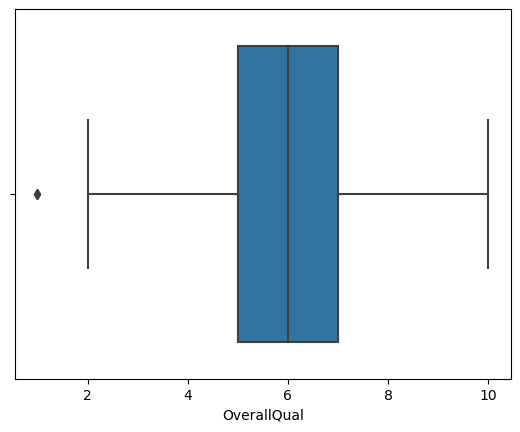

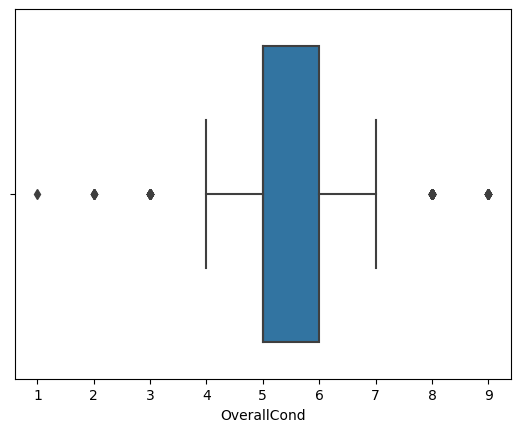

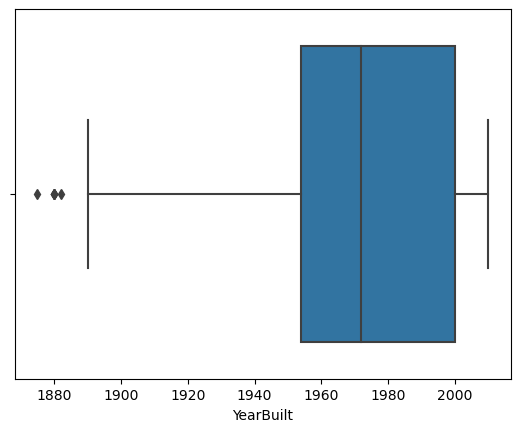

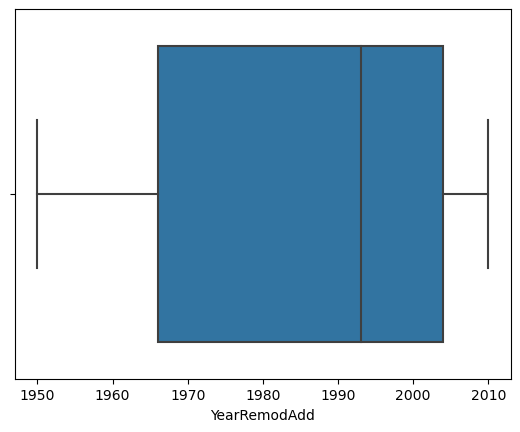

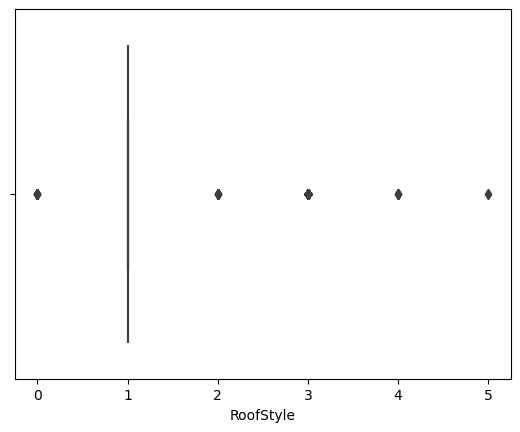

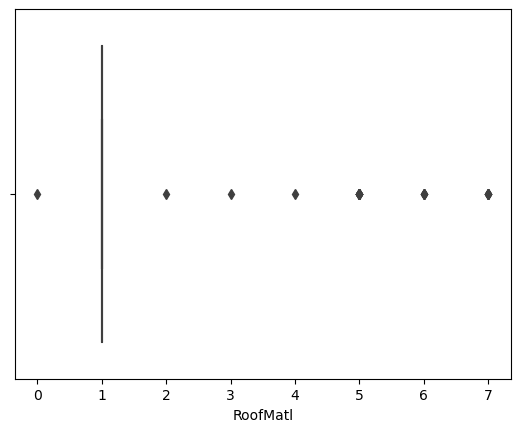

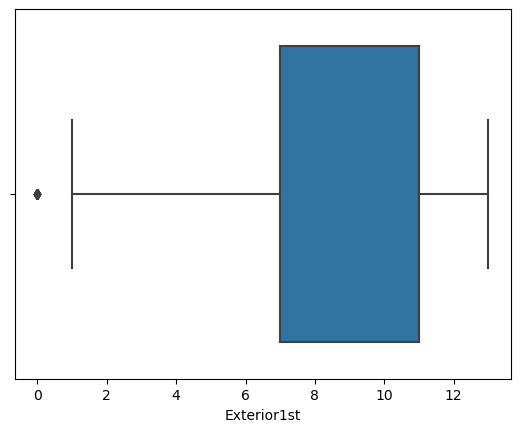

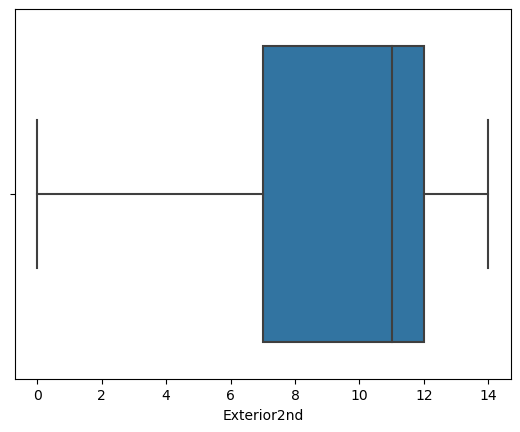

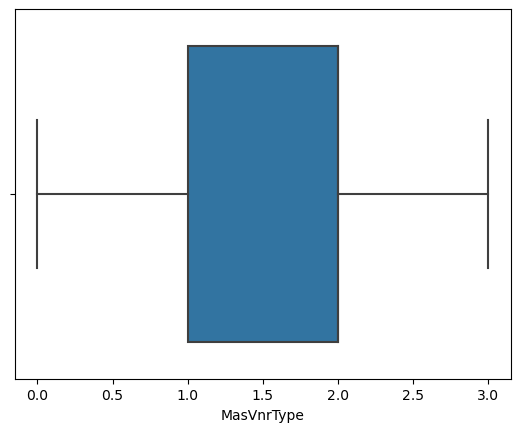

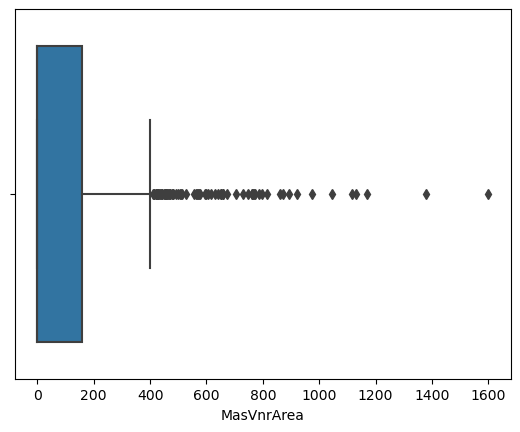

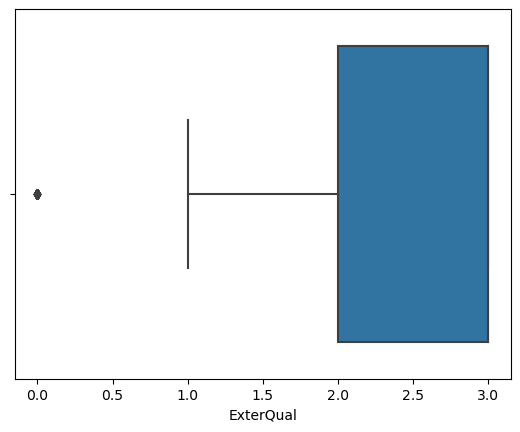

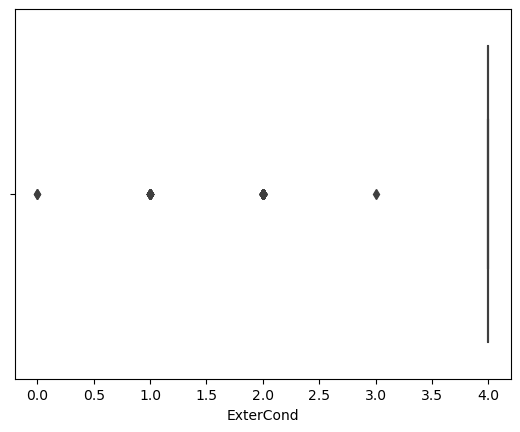

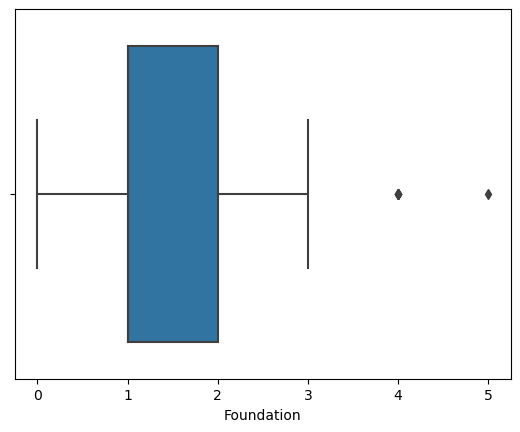

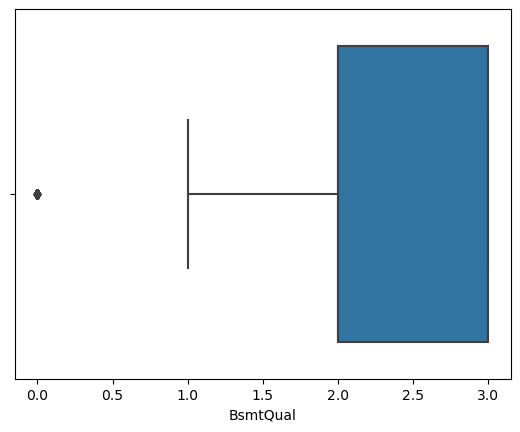

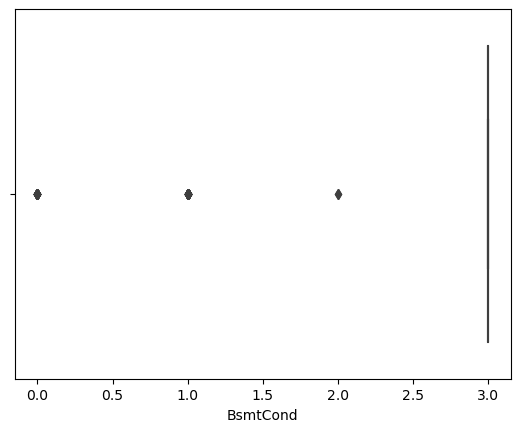

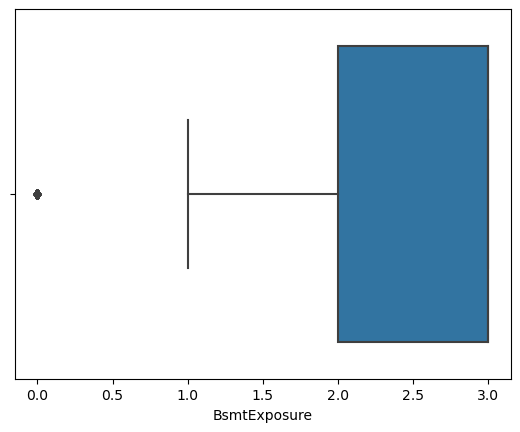

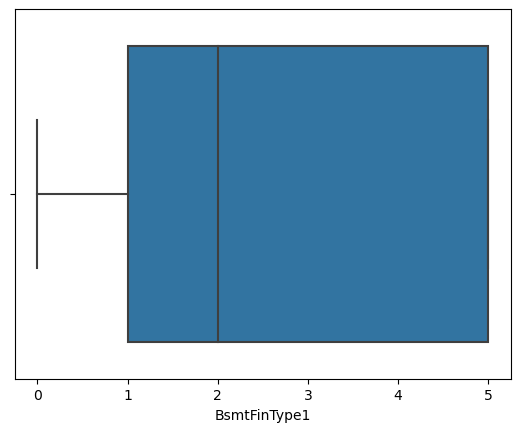

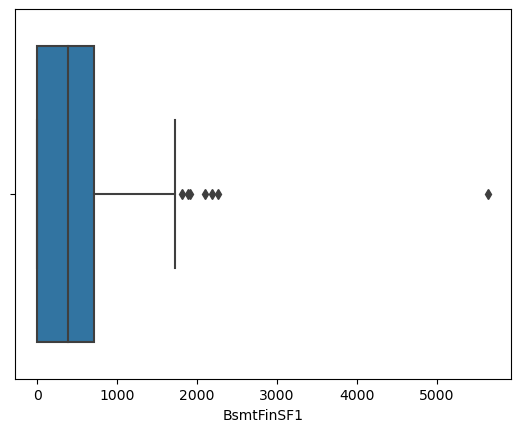

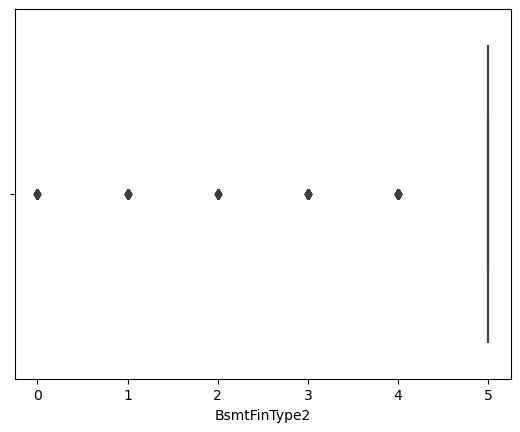

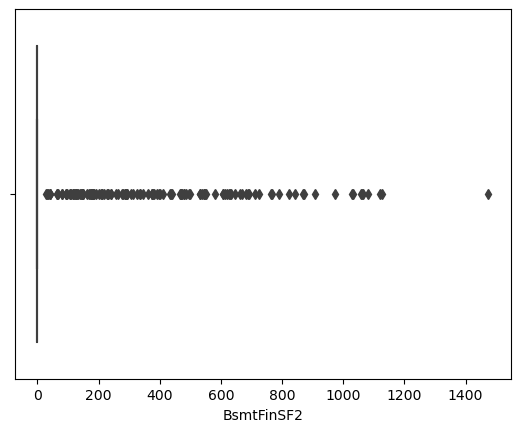

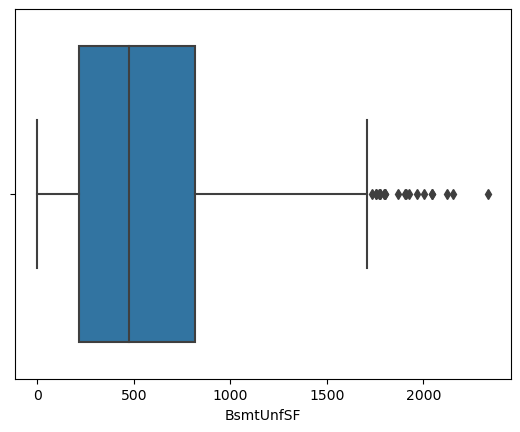

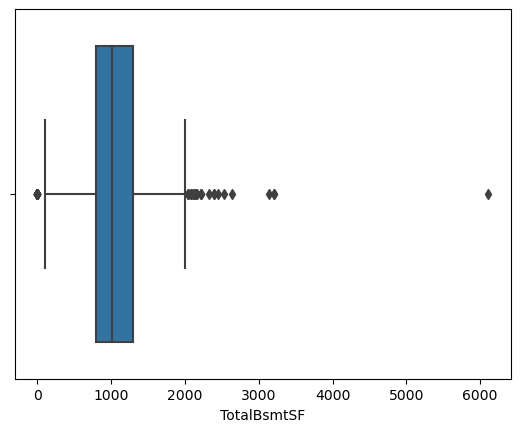

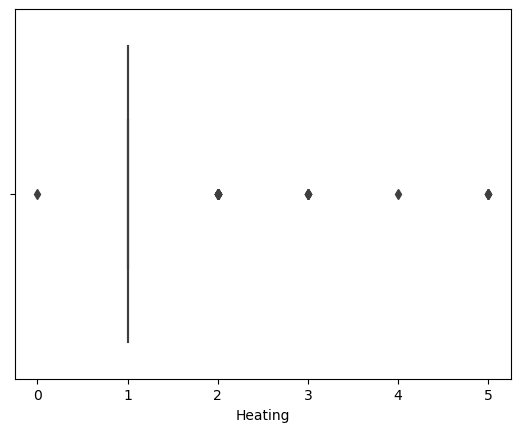

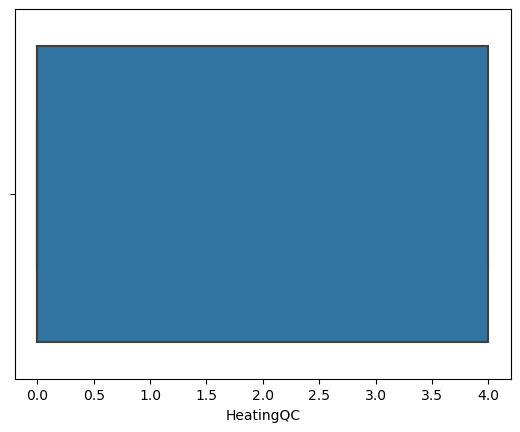

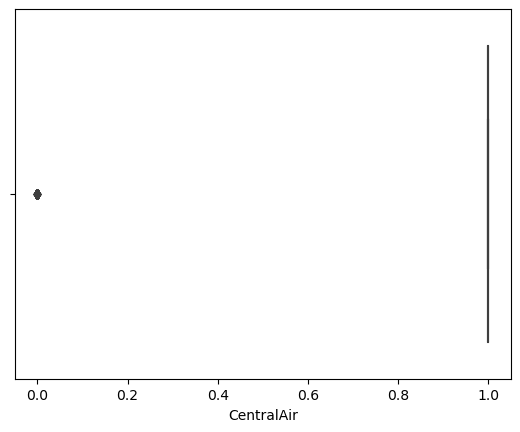

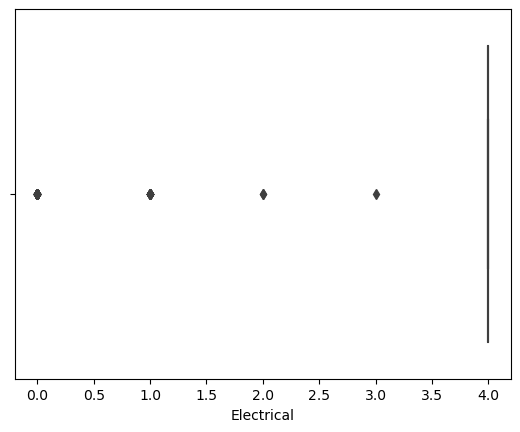

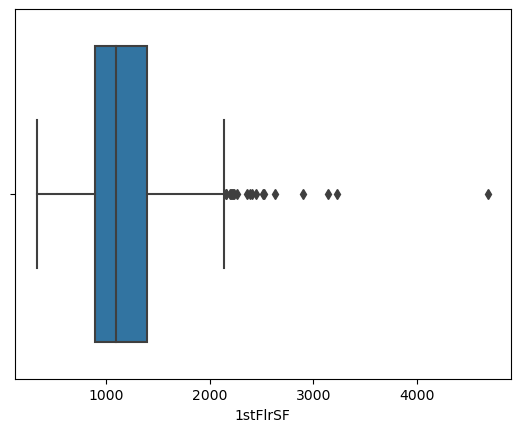

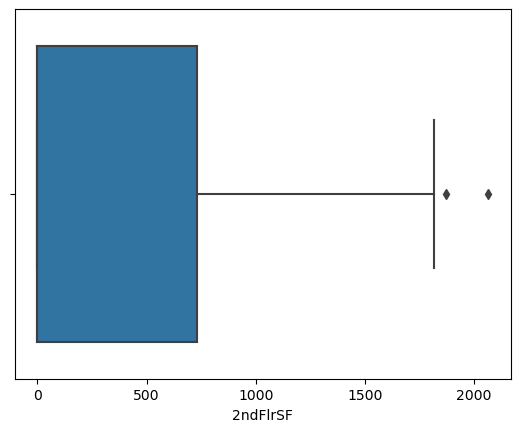

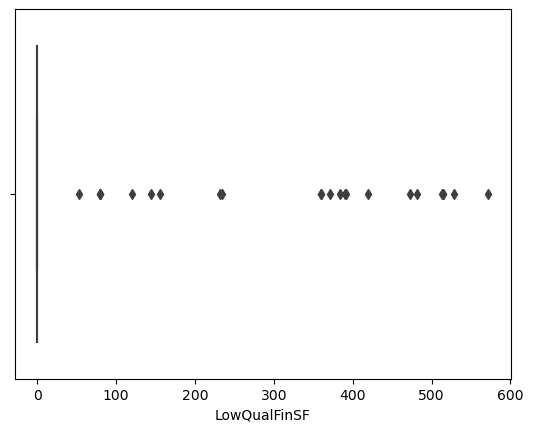

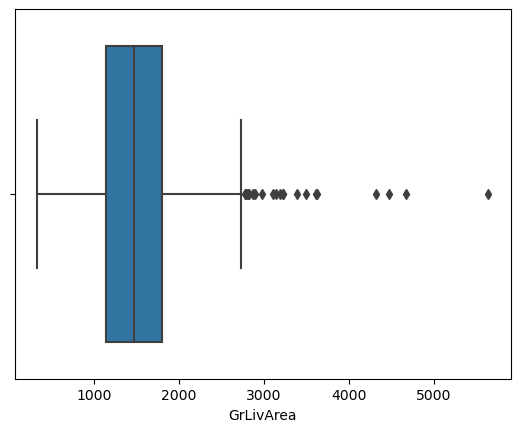

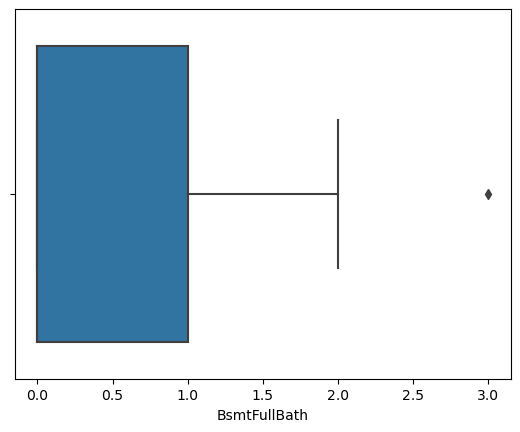

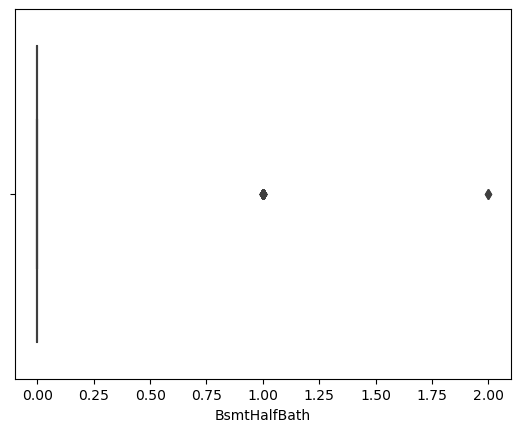

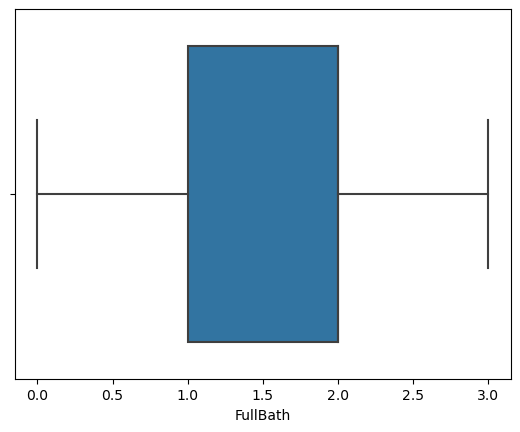

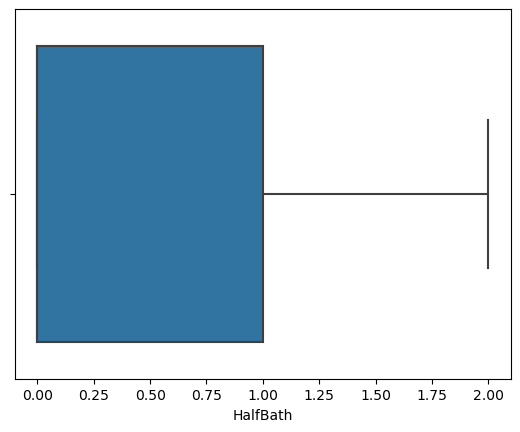

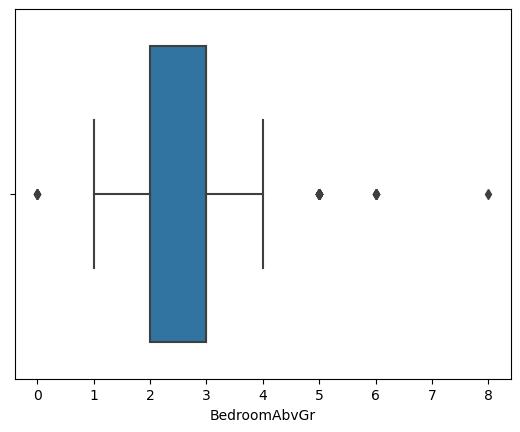

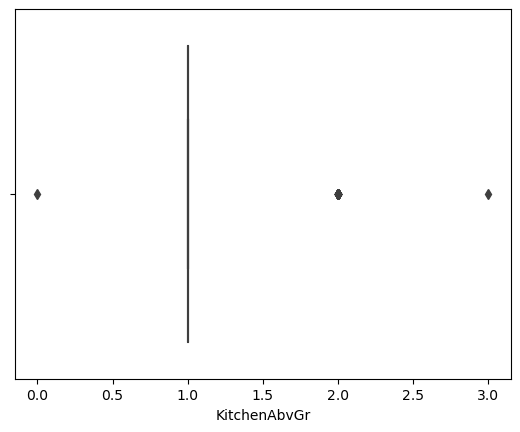

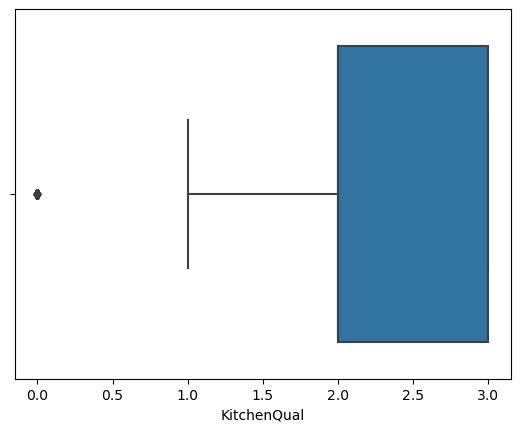

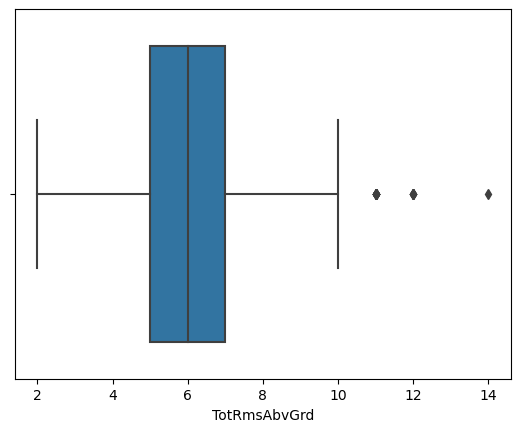

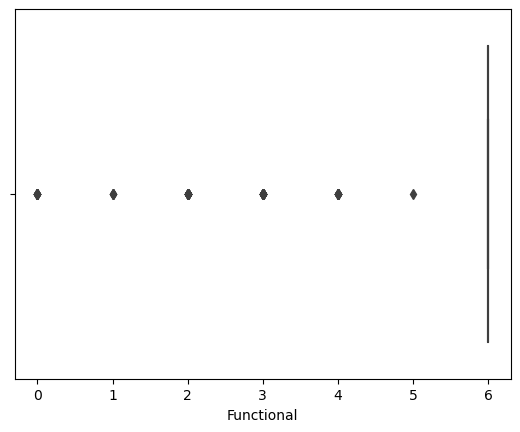

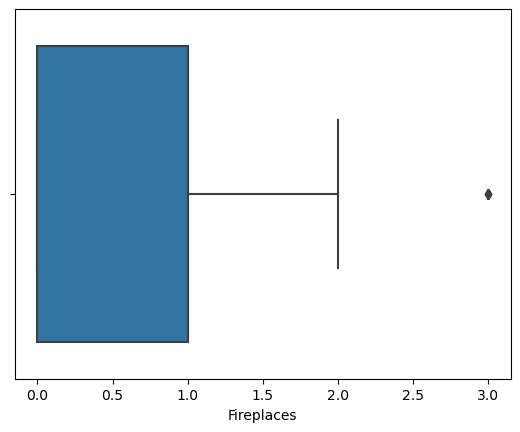

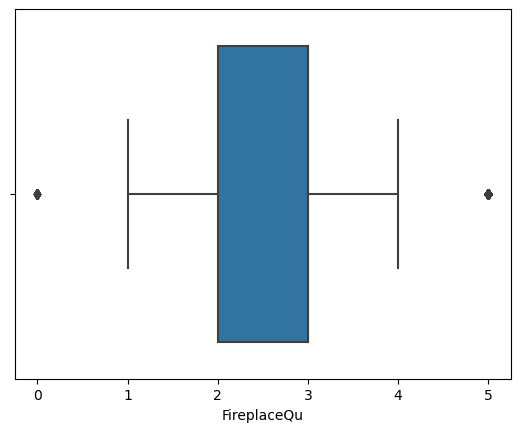

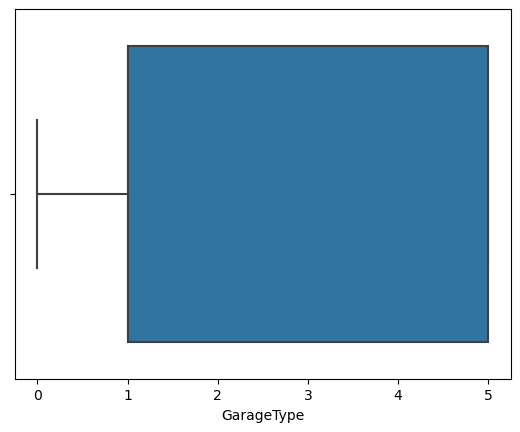

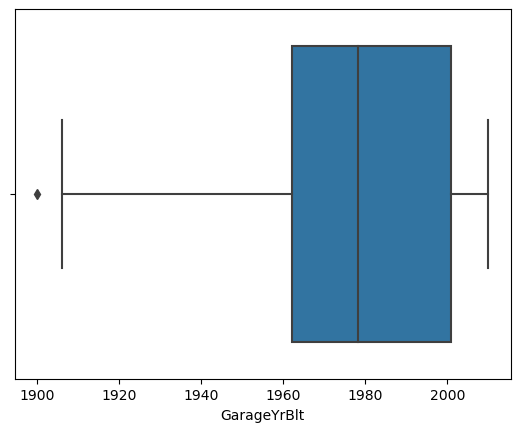

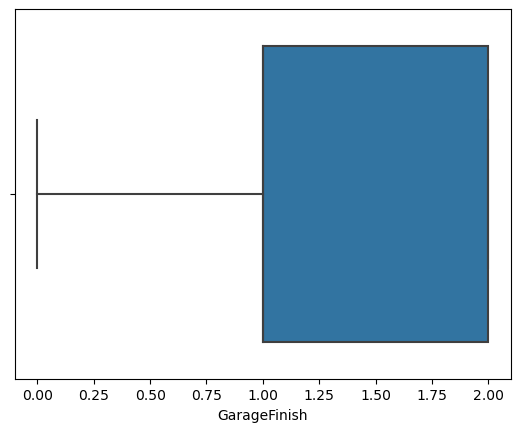

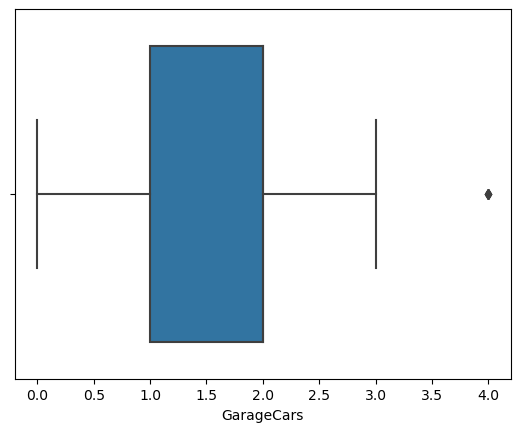

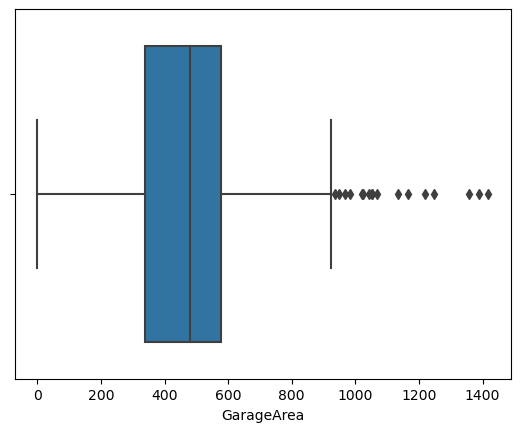

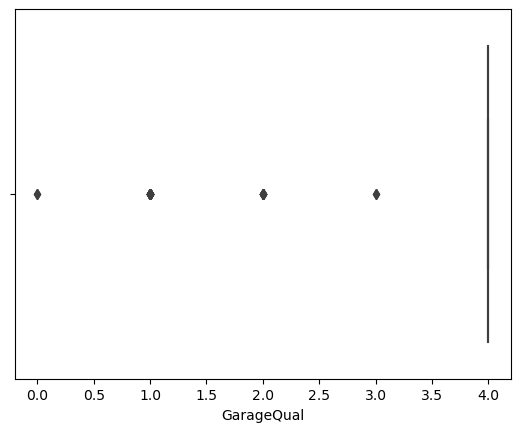

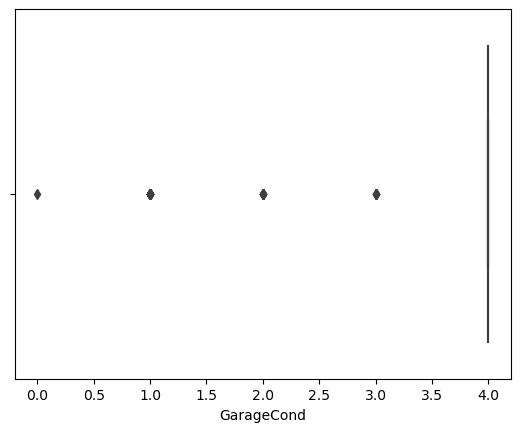

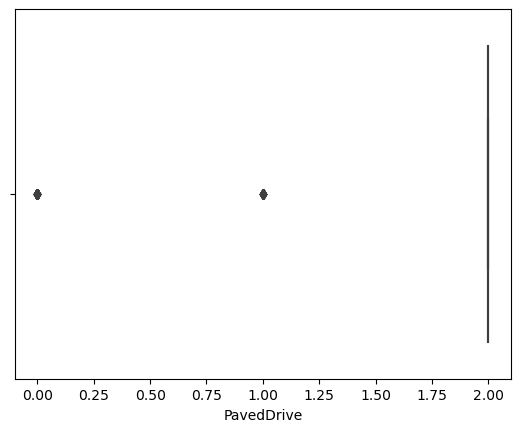

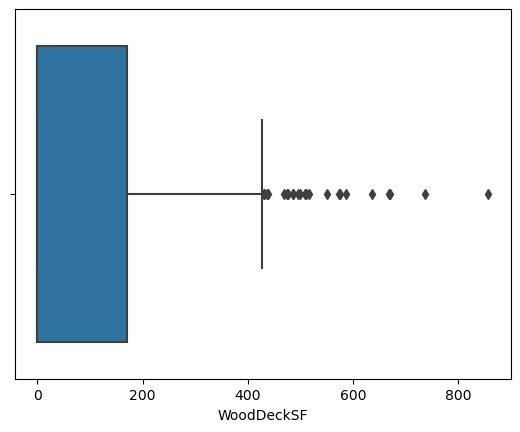

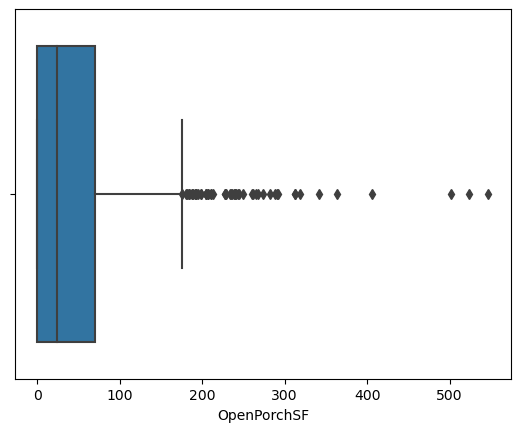

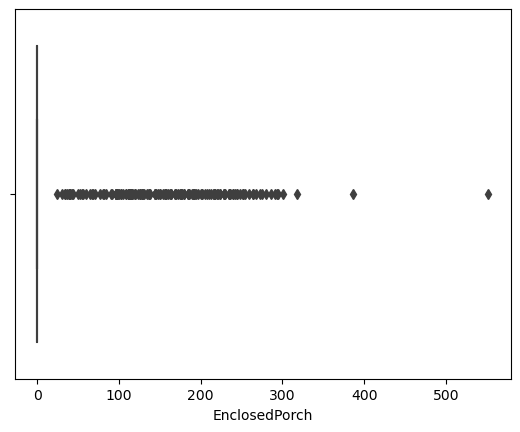

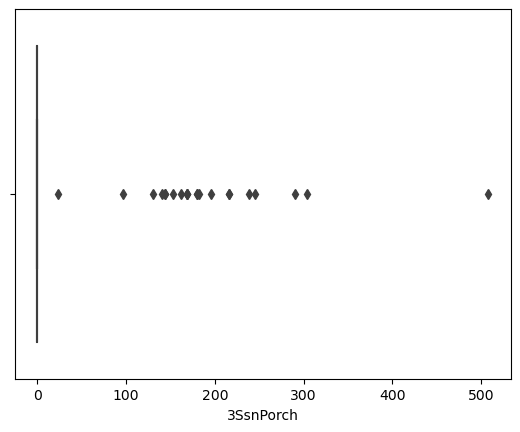

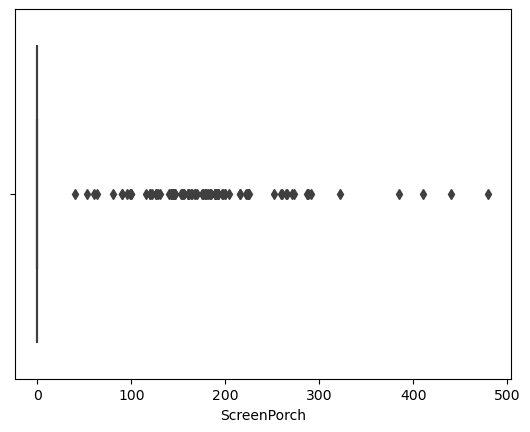

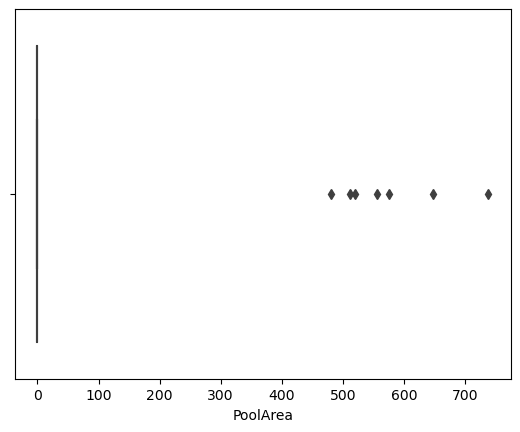

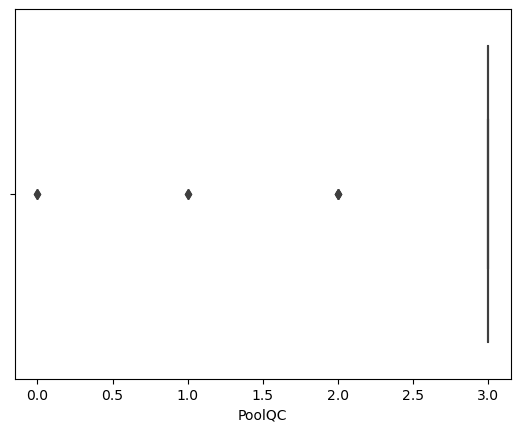

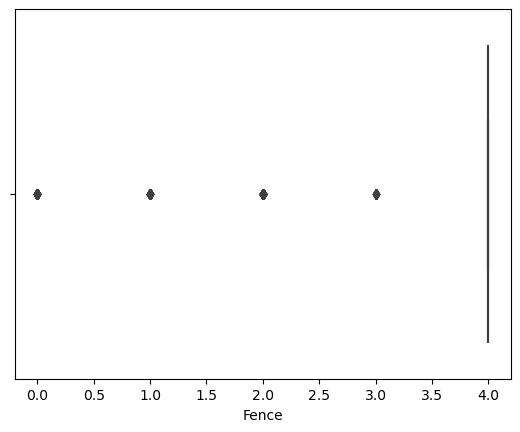

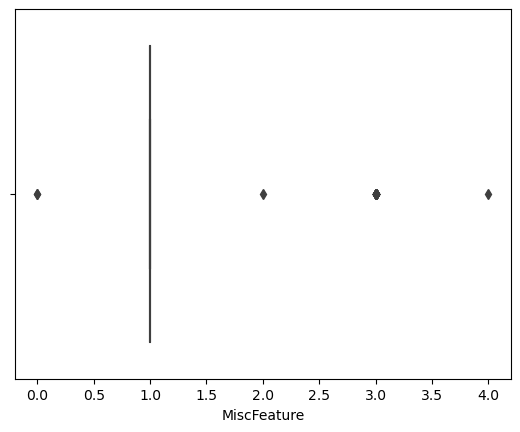

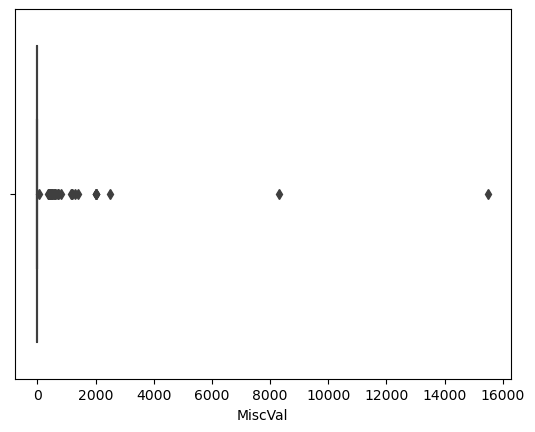

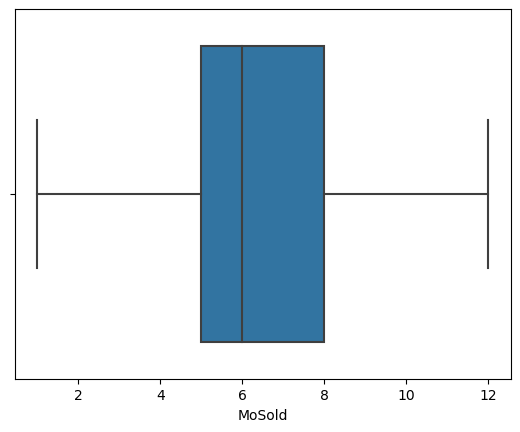

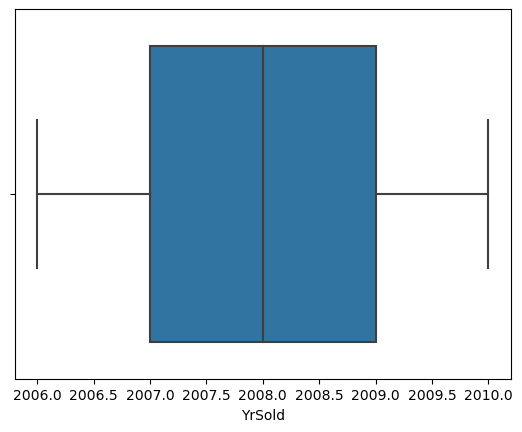

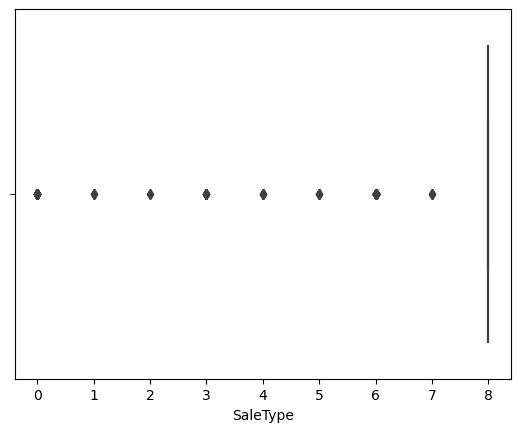

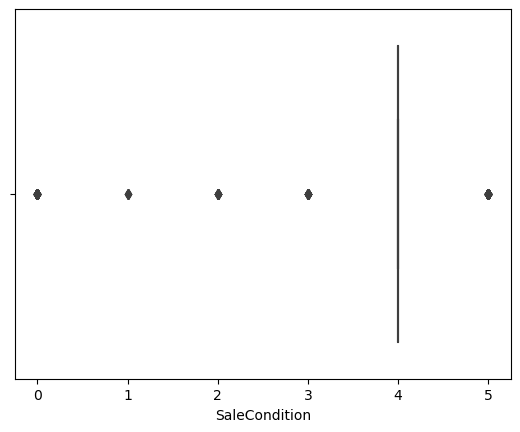

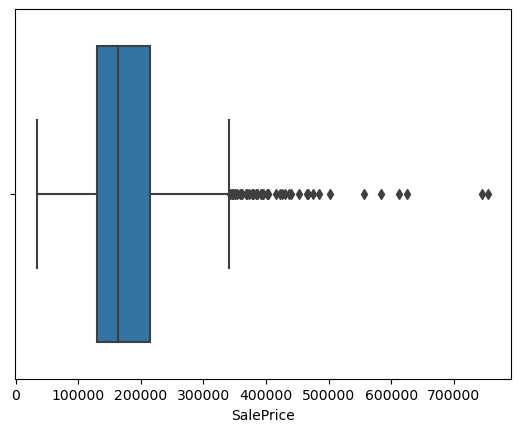

In [46]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [47]:
# Removing the Outliers

for col in df.columns:
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    upper_bridge = df[col].quantile(0.75)+(IQR*1.5)
    lower_bridge = df[col].quantile(0.25)-(IQR*1.5)
    df.loc[df[col]>upper_bridge, col]=np.nan
    df.loc[df[col]<lower_bridge, col]=np.nan
# Treating the outliers by imputing the median values 
    df[col].fillna(df[col].median(),inplace=True)

#### Skewness: 

MSSubClass       0.815833
MSZoning         0.000000
LotFrontage     -0.529371
LotArea         -0.074638
Street           0.000000
                   ...   
MoSold           0.220979
YrSold           0.115765
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.692914
Length: 80, dtype: float64
MSSubClass
0.8147846287705218


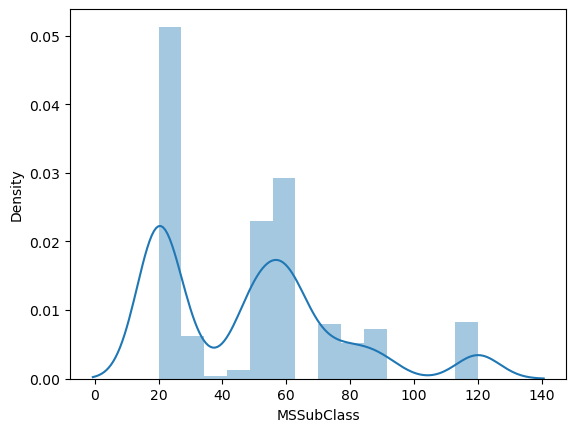

MSZoning
0.0


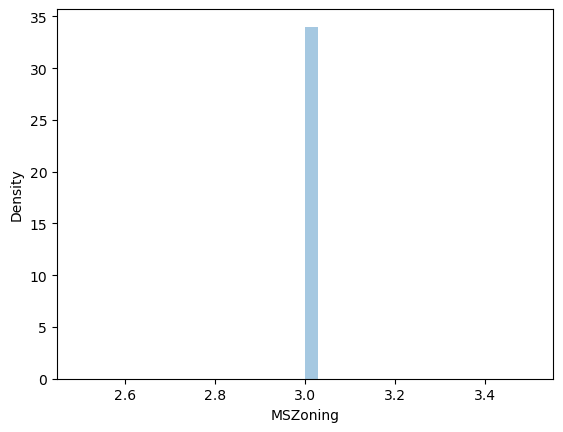

LotFrontage
-0.5286912464930471


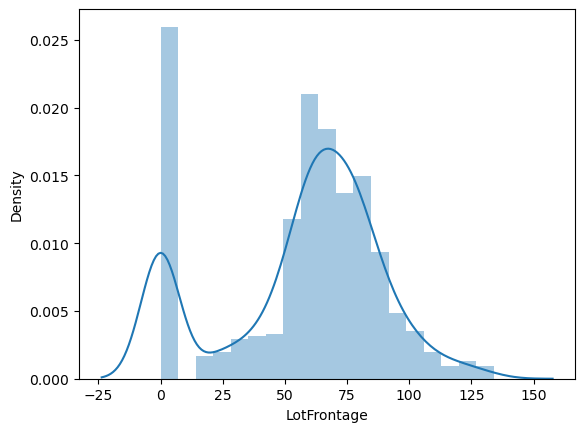

LotArea
-0.07454215943365032


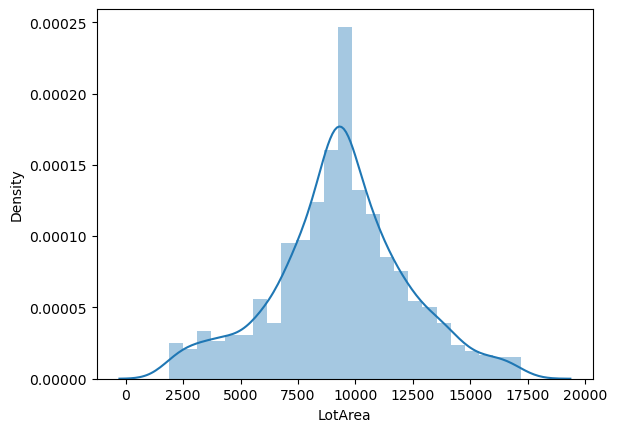

Street
0.0


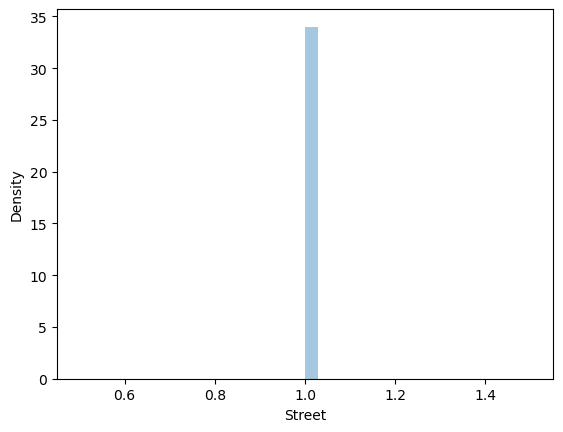

Alley
0.0


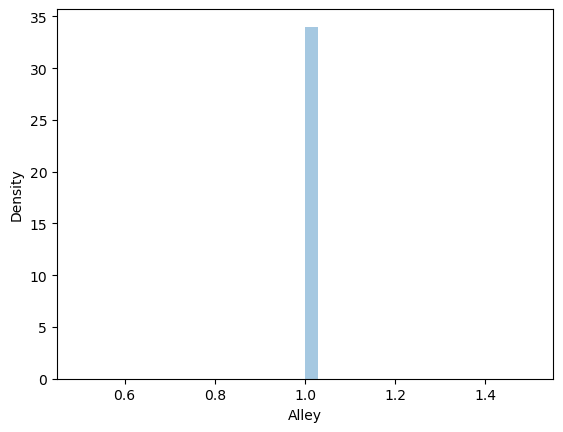

LotShape
-0.6029995753170352


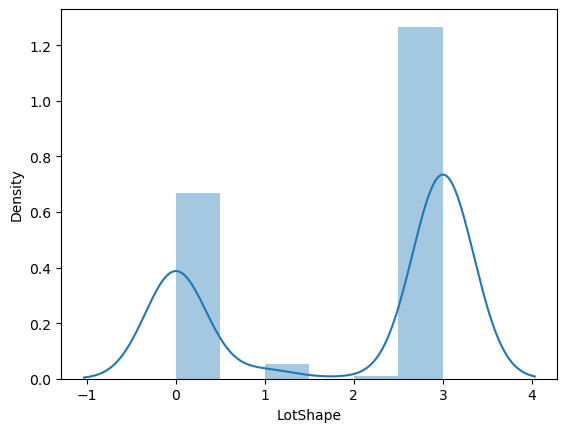

LandContour
0.0


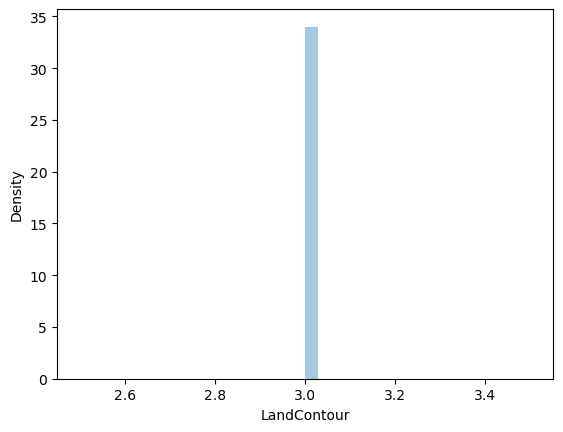

Utilities
0.0


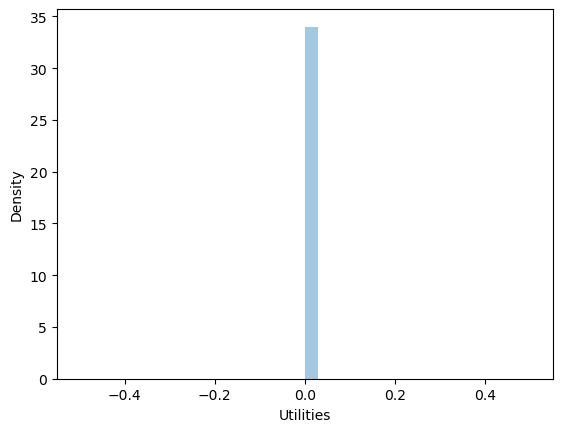

LotConfig
-1.1173837676607994


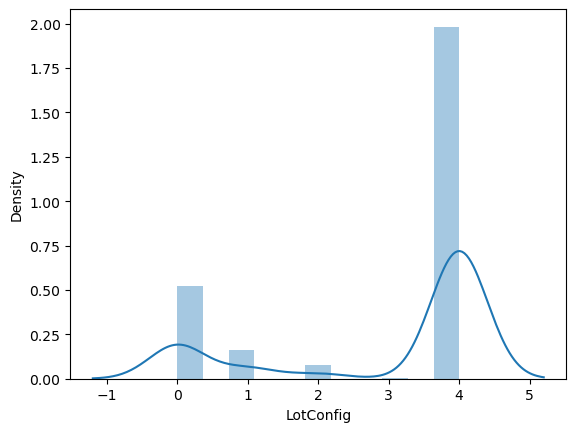

LandSlope
0.0


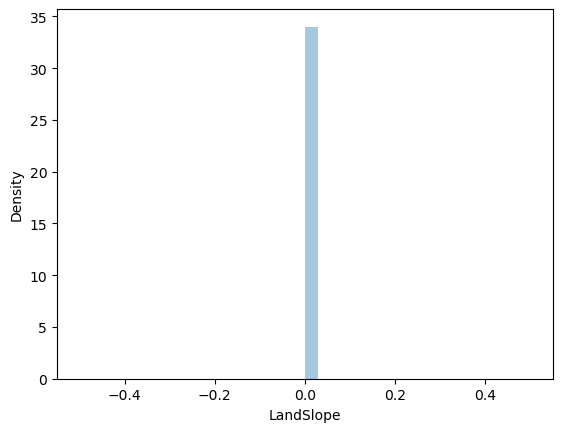

Neighborhood
0.04367910599710877


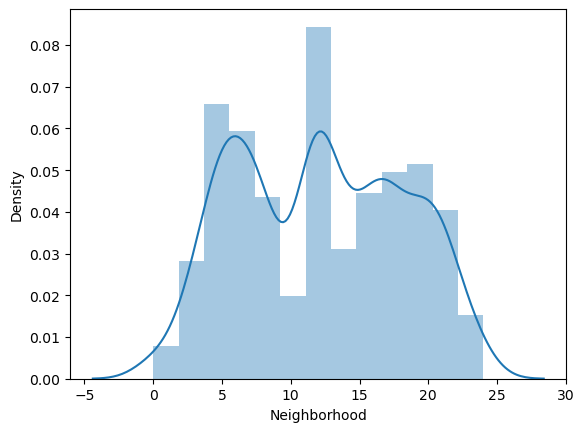

Condition1
0.0


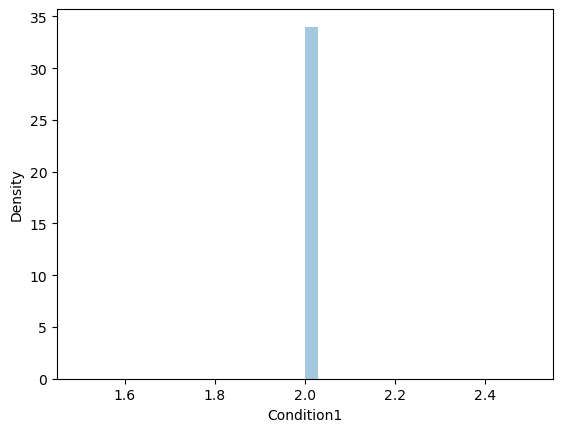

Condition2
0.0


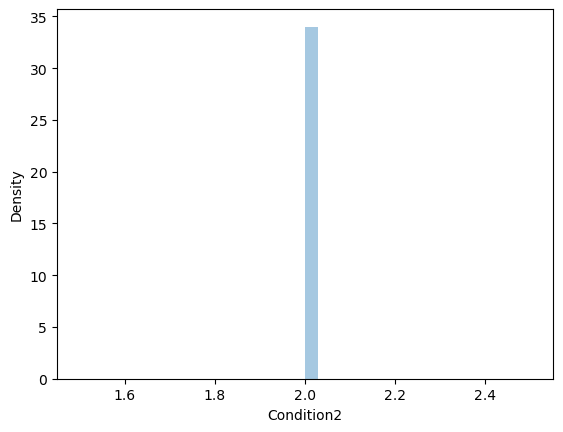

BldgType
0.0


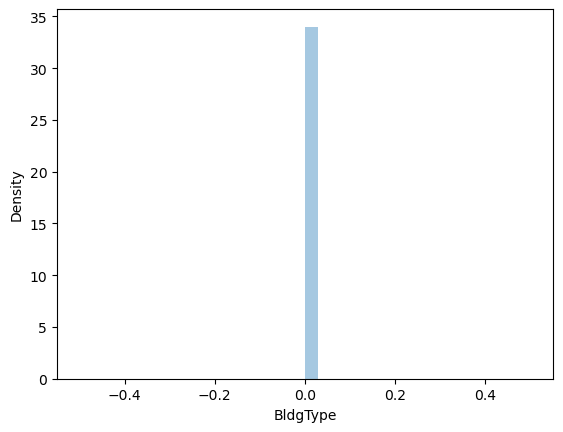

HouseStyle
0.28531317158043673


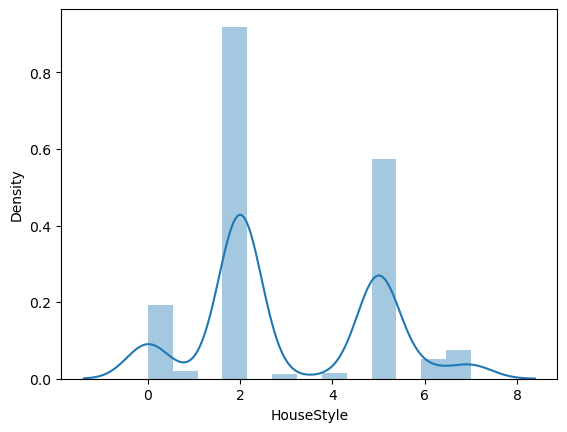

OverallQual
0.2503159068755271


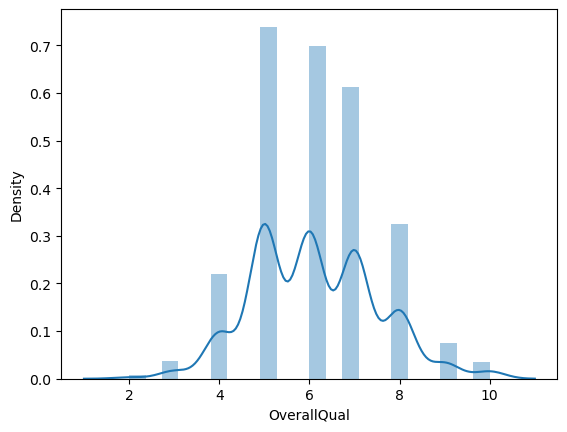

OverallCond
0.8986020145365574


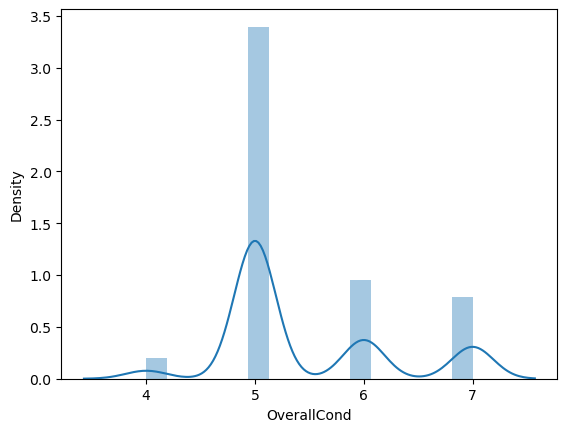

YearBuilt
-0.5161565190558709


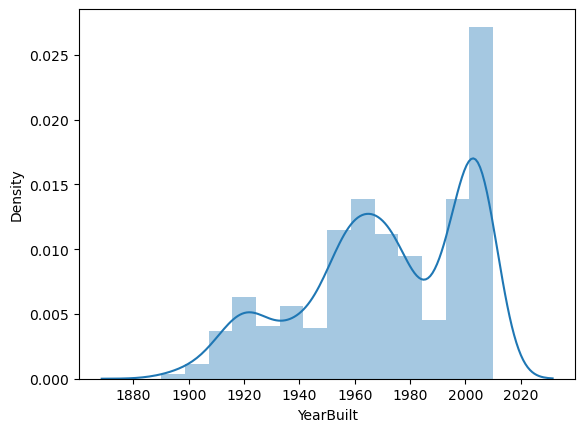

YearRemodAdd
-0.4952264998621046


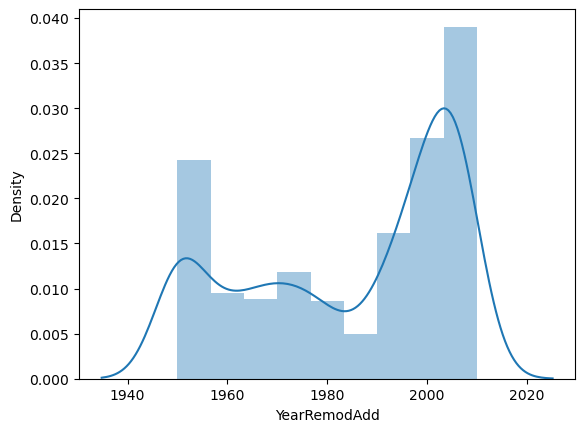

RoofStyle
0.0


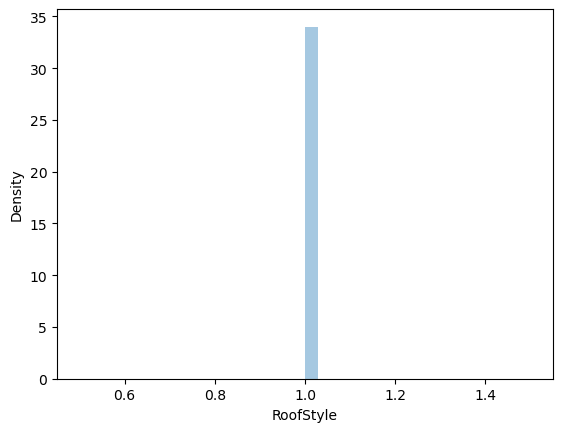

RoofMatl
0.0


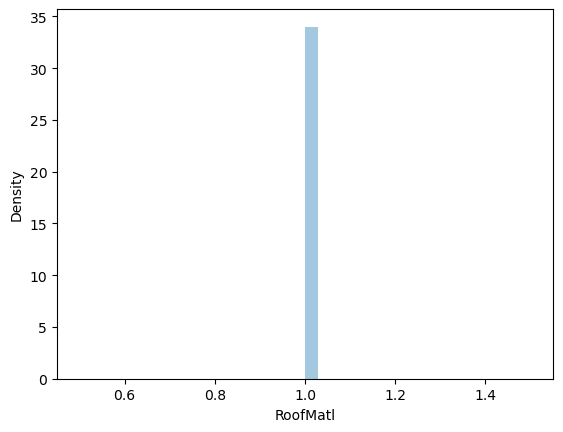

Exterior1st
-0.48763942683993206


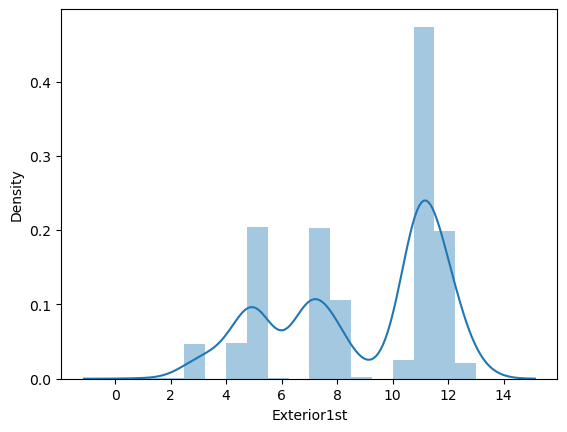

Exterior2nd
-0.5915880072249137


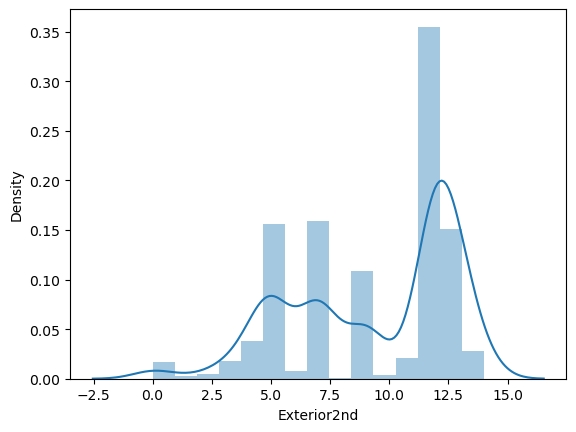

MasVnrType
-0.10447455505388363


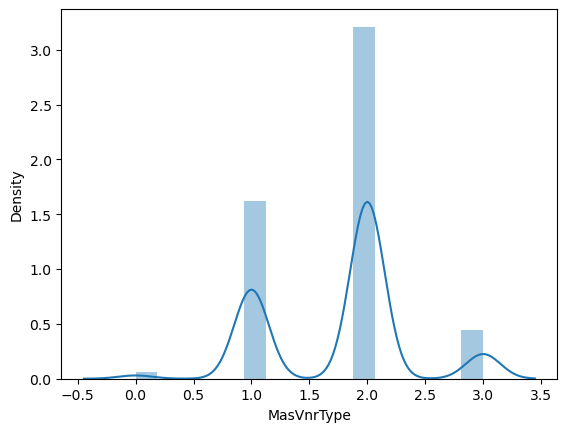

MasVnrArea
1.5471295238868557


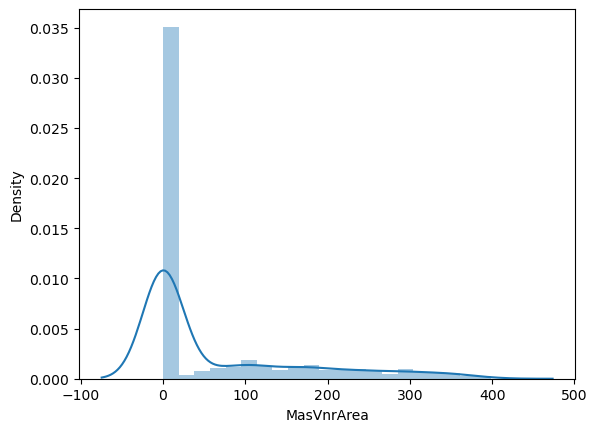

ExterQual
-0.8153261145948


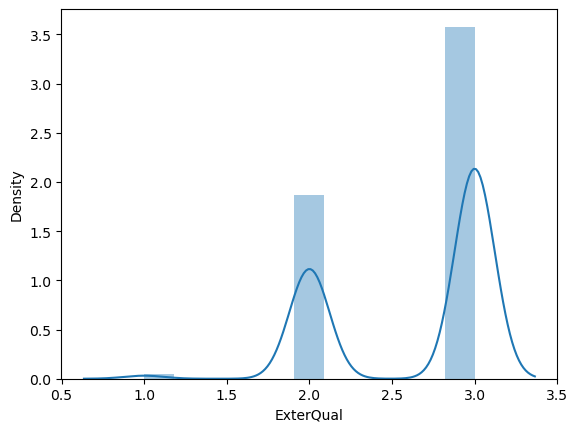

ExterCond
0.0


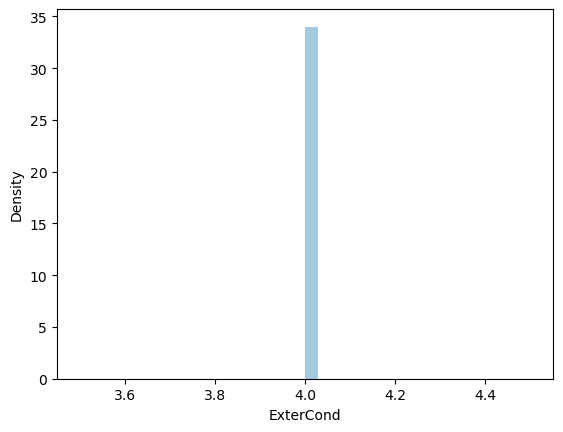

Foundation
-0.299523693860655


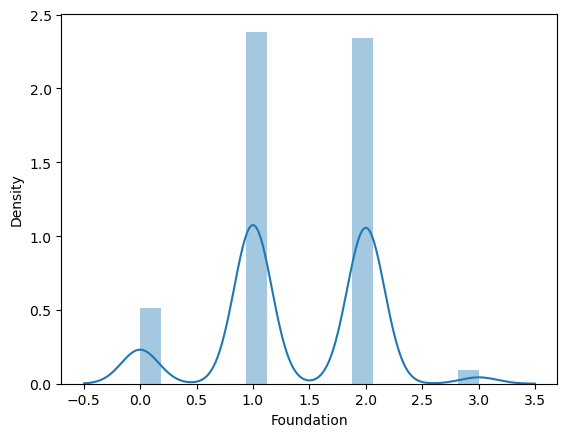

BsmtQual
-0.5503436314767429


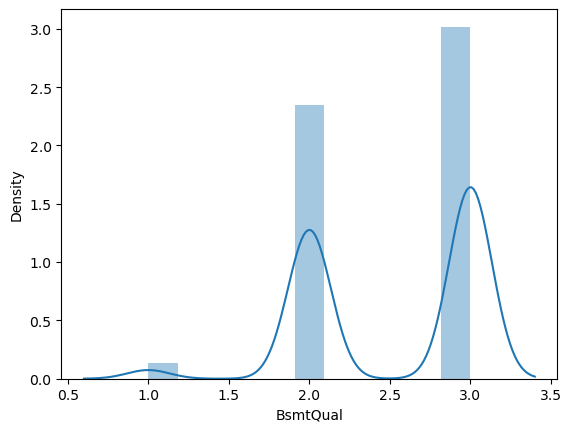

BsmtCond
0.0


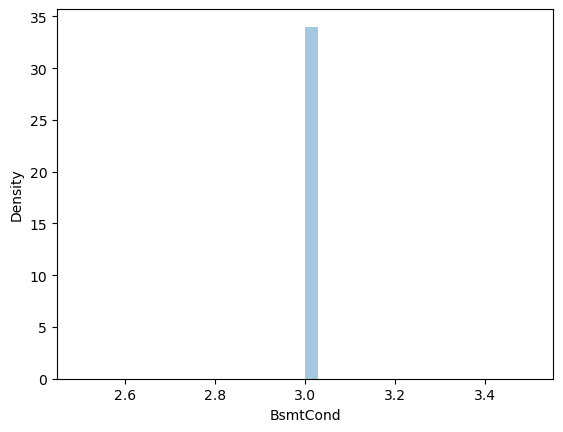

BsmtExposure
-2.1371971864560075


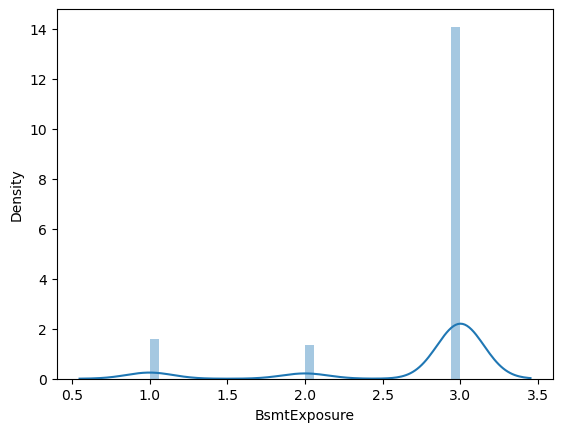

BsmtFinType1
-0.06881264488701706


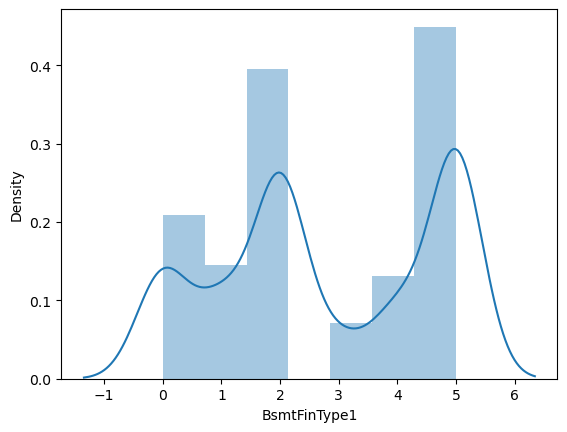

BsmtFinSF1
0.675240004262118


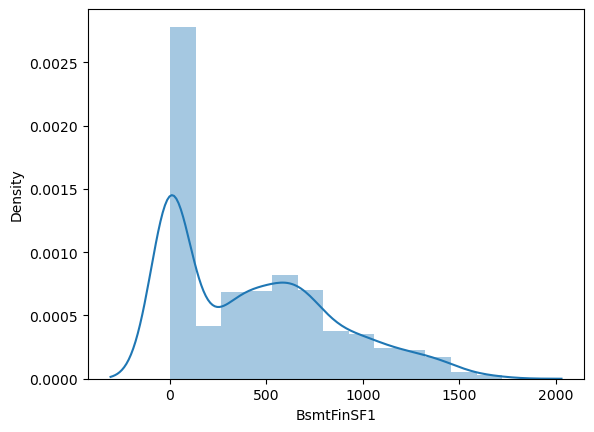

BsmtFinType2
0.0


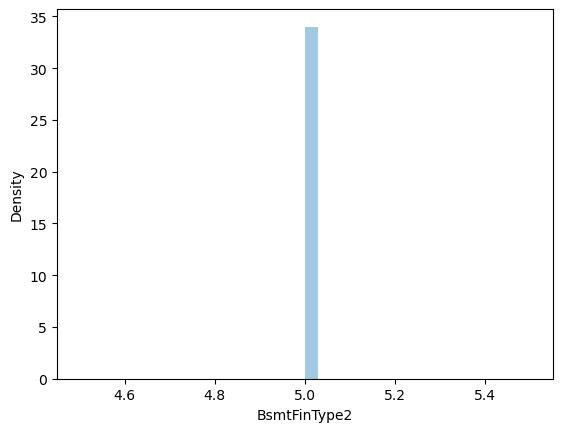

BsmtFinSF2
0.0


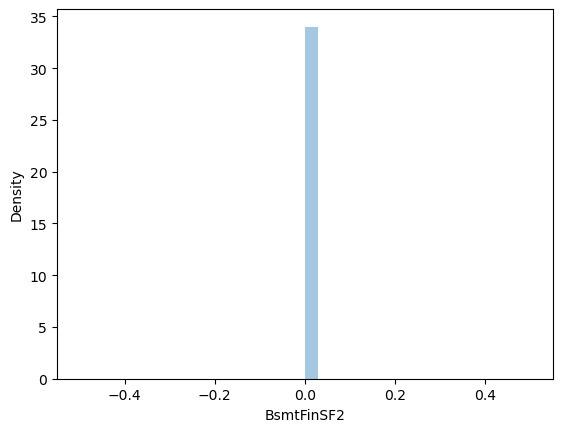

BsmtUnfSF
0.737794936163234


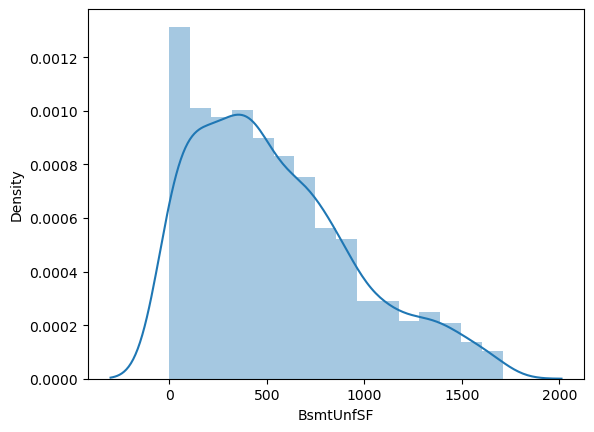

TotalBsmtSF
0.5400705934803146


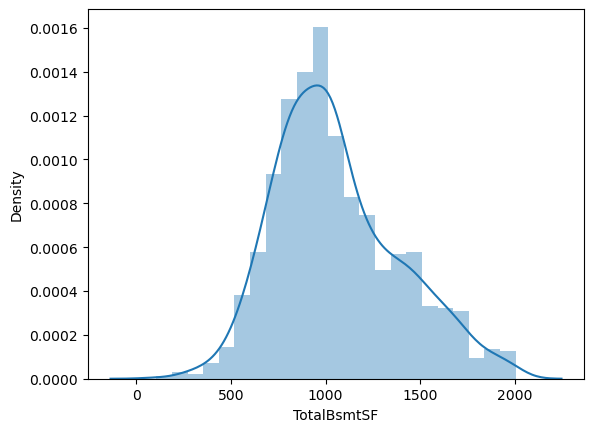

Heating
0.0


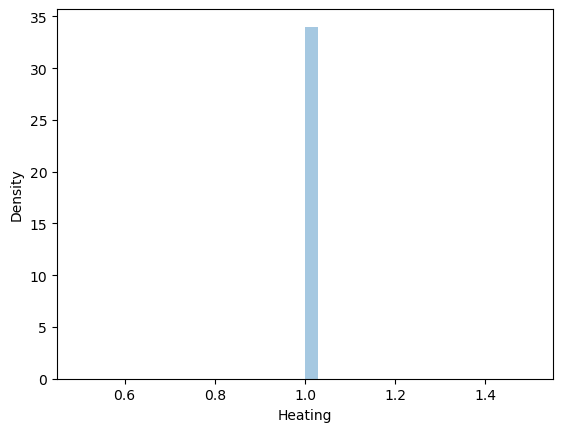

HeatingQC
0.4493552502142912


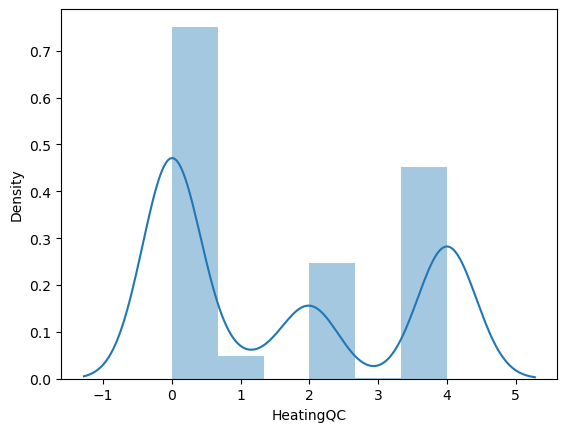

CentralAir
0.0


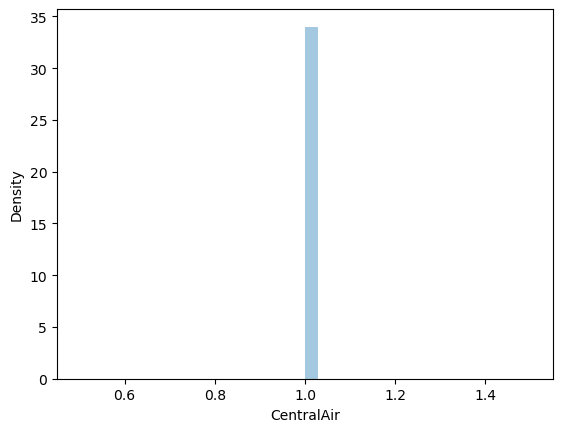

Electrical
0.0


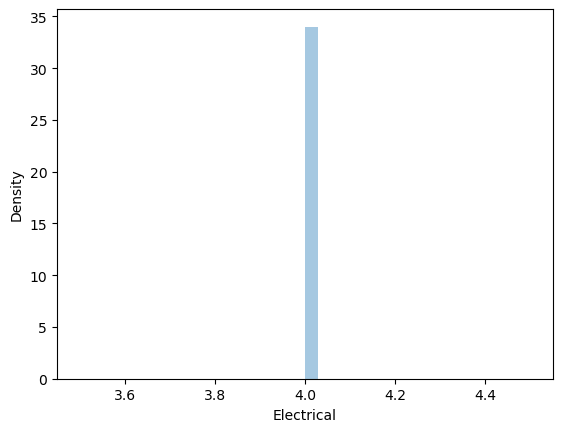

1stFlrSF
0.5628140560946557


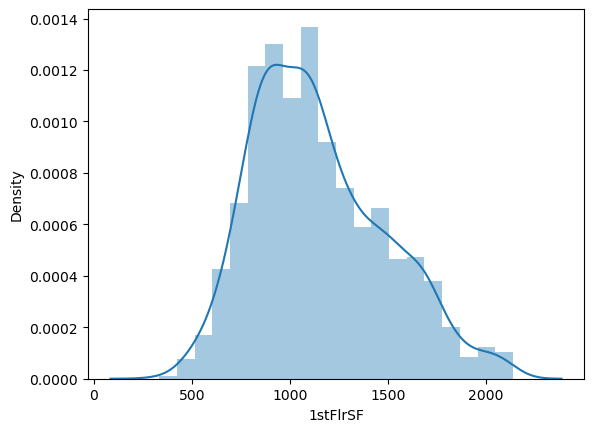

2ndFlrSF
0.783531655558469


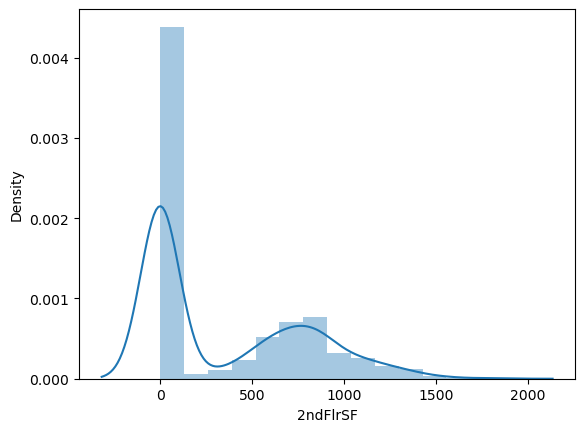

LowQualFinSF
0.0


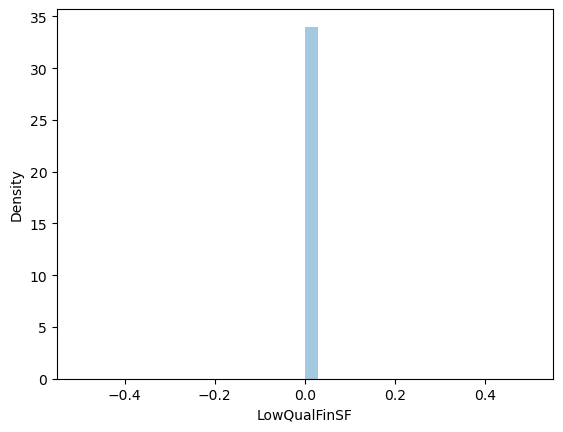

GrLivArea
0.4663750067907318


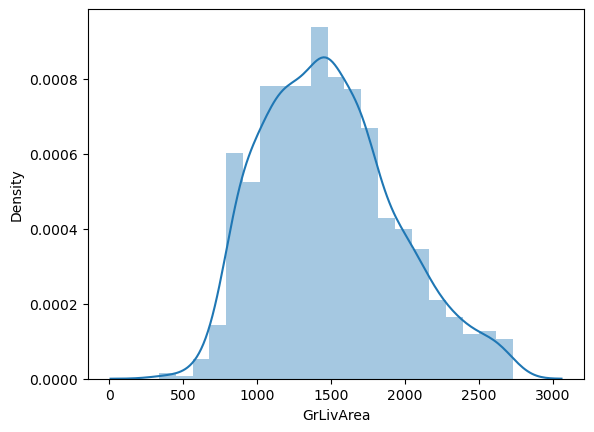

BsmtFullBath
0.5540502732181205


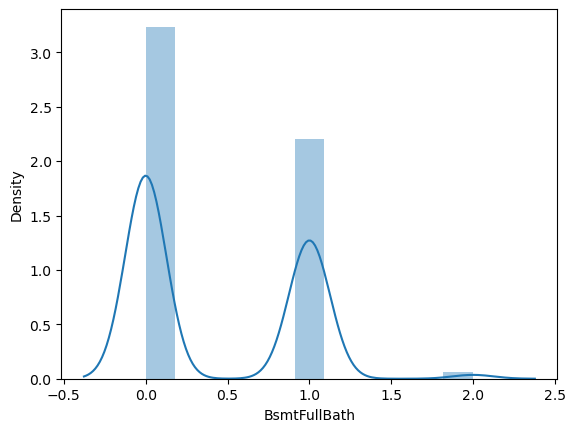

BsmtHalfBath
0.0


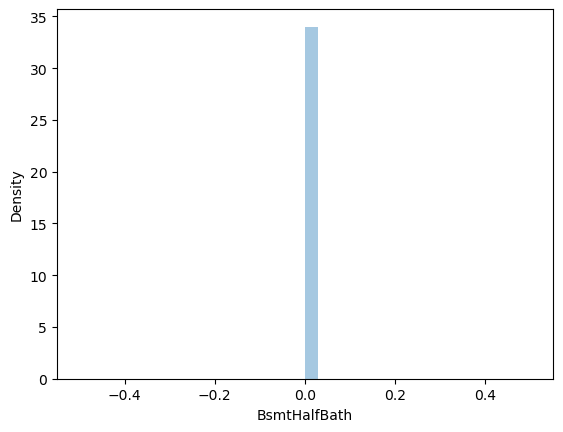

FullBath
0.057734441478522844


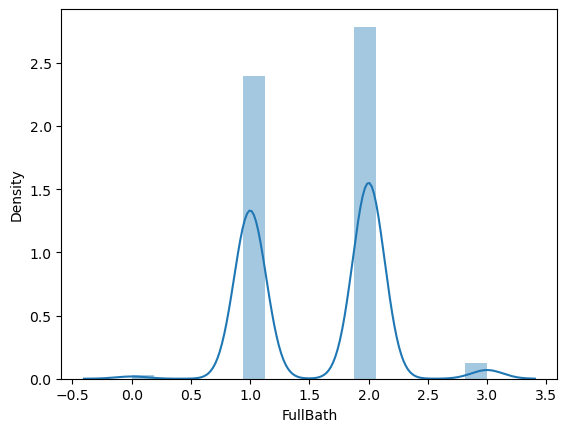

HalfBath
0.6556483531827046


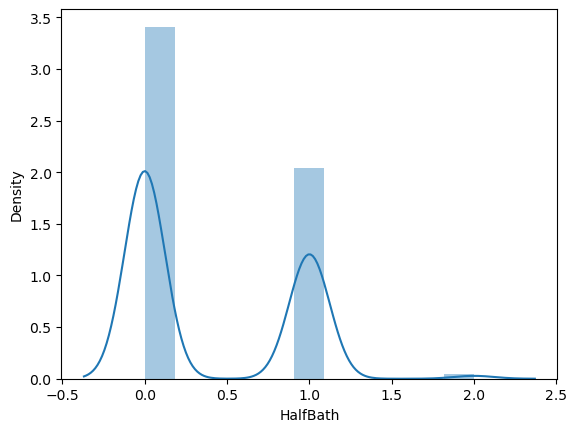

BedroomAbvGr
-0.3288280117090421


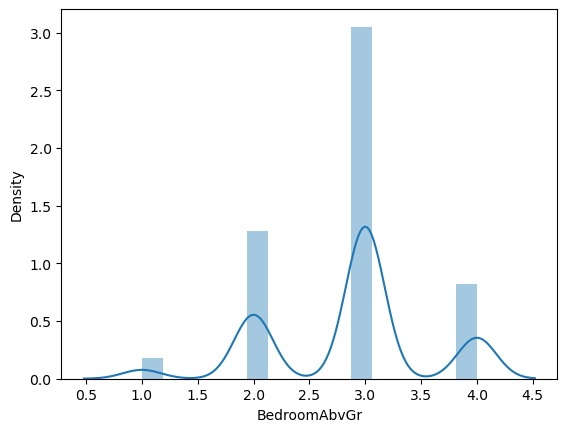

KitchenAbvGr
0.0


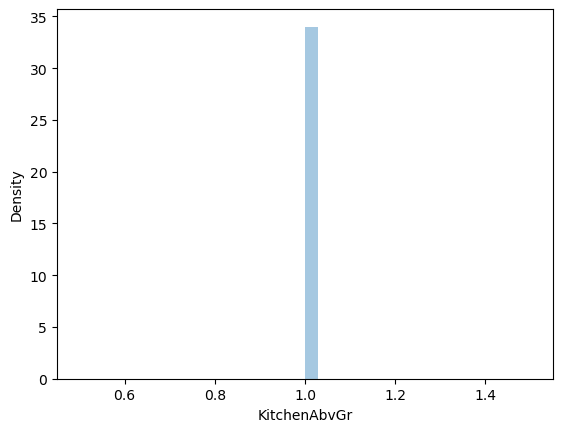

KitchenQual
-0.6255411452504613


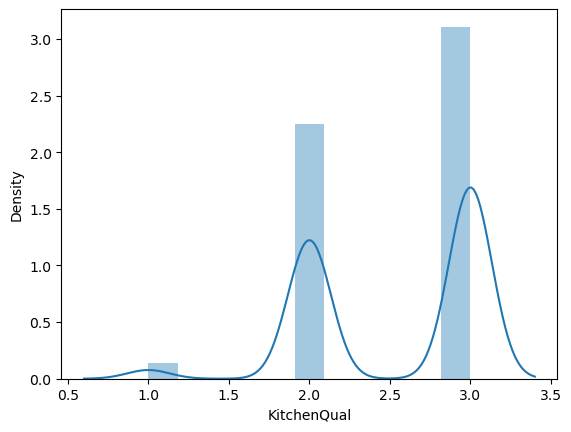

TotRmsAbvGrd
0.33657395289681996


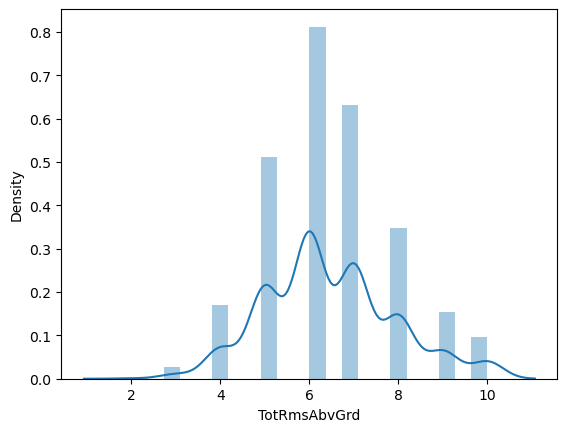

Functional
0.0


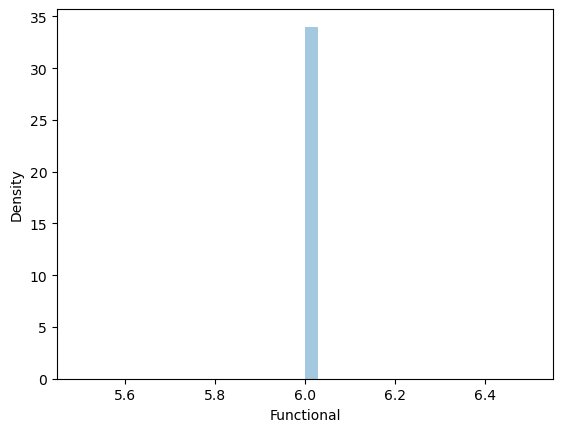

Fireplaces
0.5438481304473629


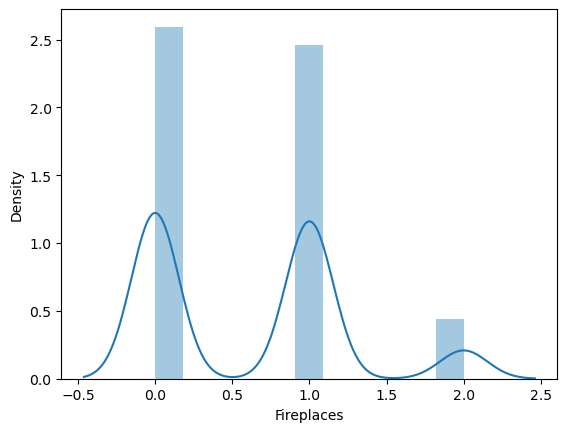

FireplaceQu
-1.0472582255321197


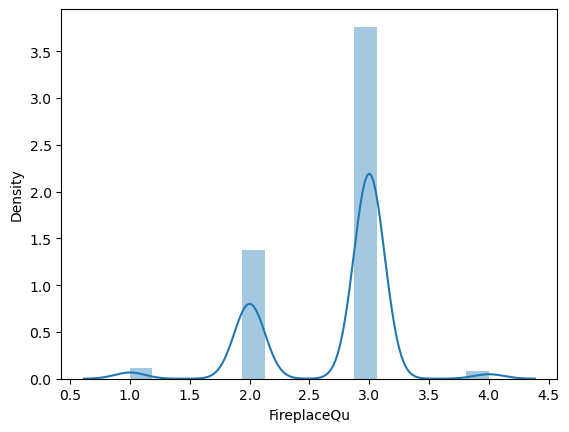

GarageType
0.830073919891636


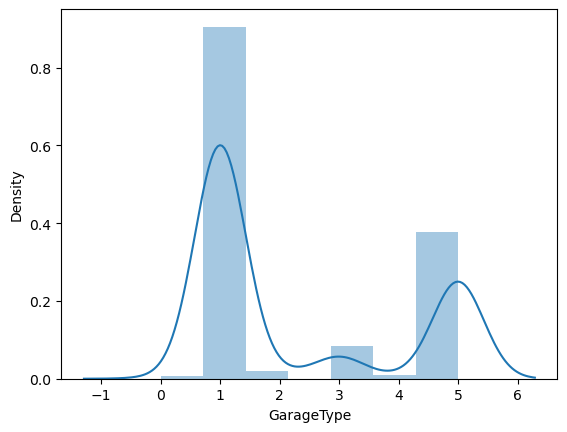

GarageYrBlt
-0.6501001359120109


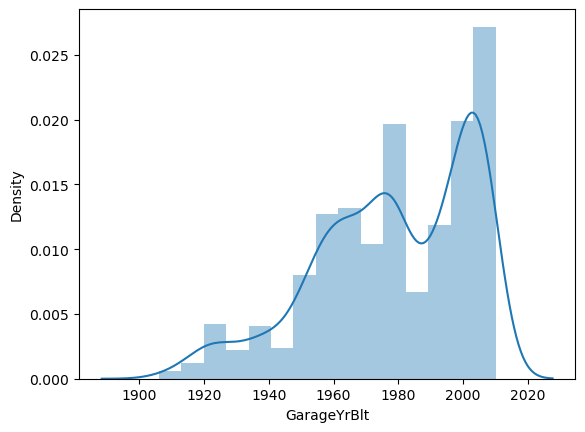

GarageFinish
-0.449611580996925


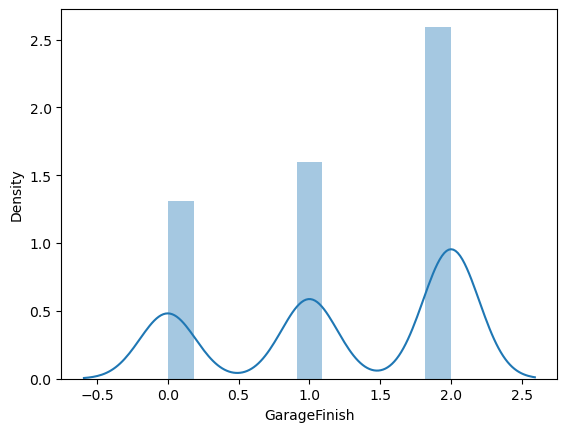

GarageCars
-0.4421359640239999


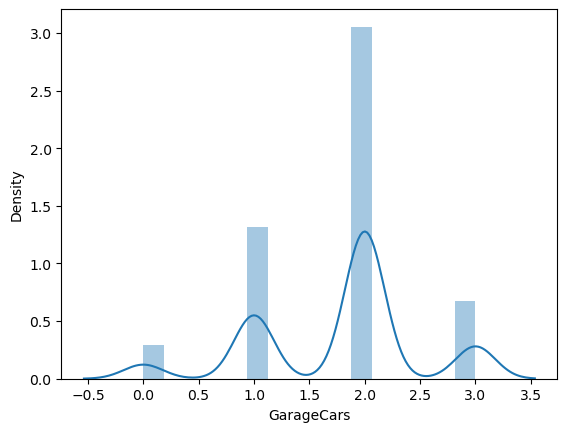

GarageArea
-0.1992754582786731


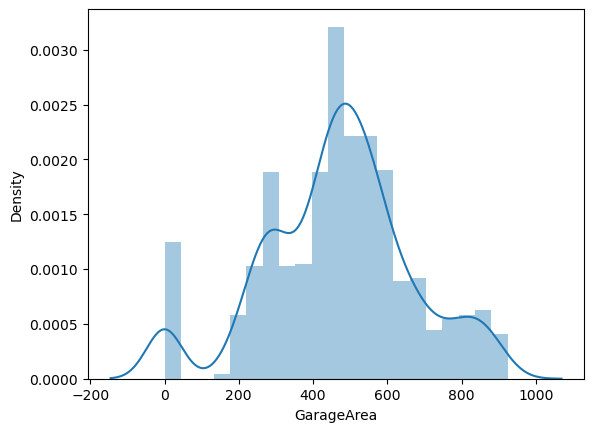

GarageQual
0.0


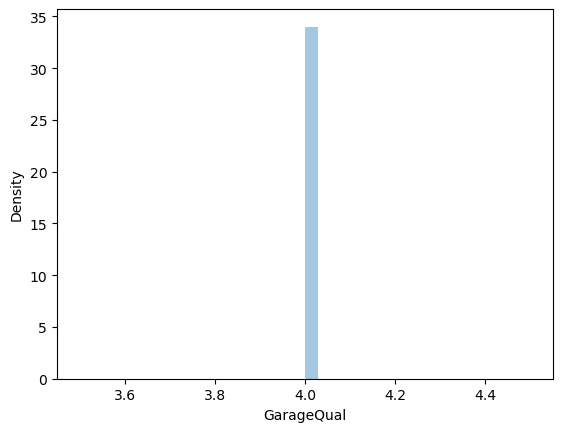

GarageCond
0.0


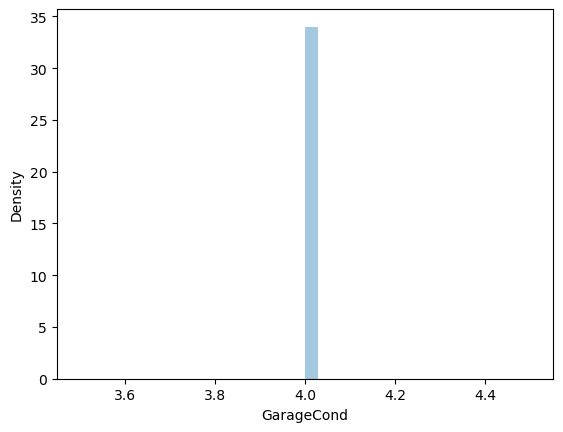

PavedDrive
0.0


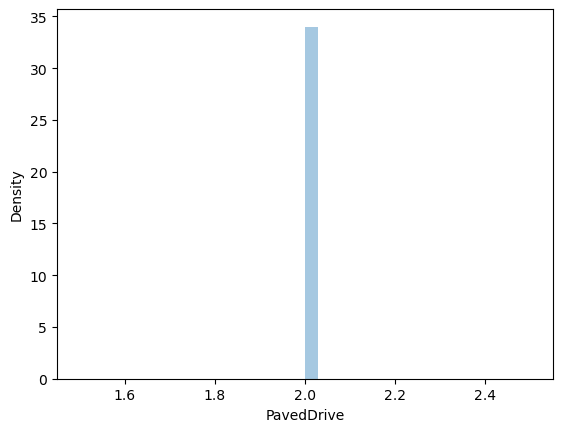

WoodDeckSF
1.0020448954571926


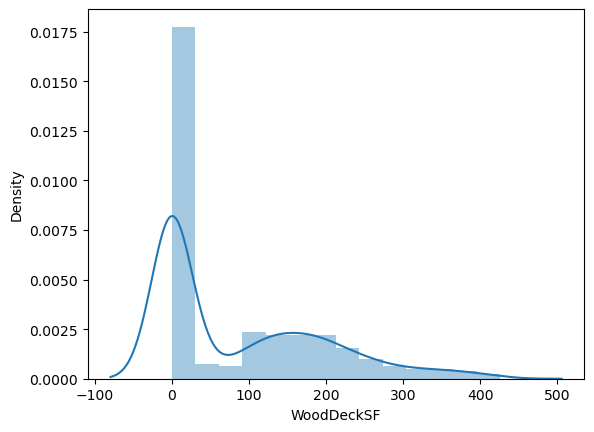

OpenPorchSF
1.2385414928681704


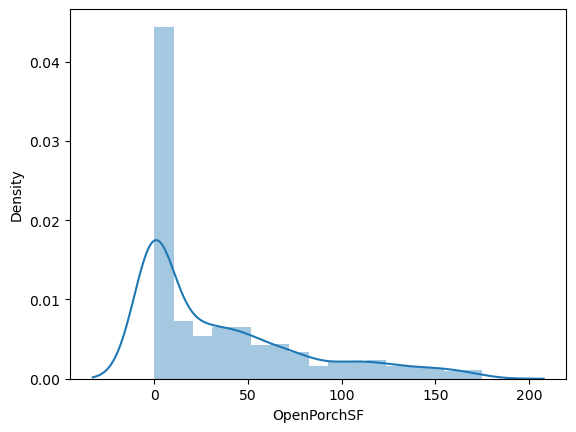

EnclosedPorch
0.0


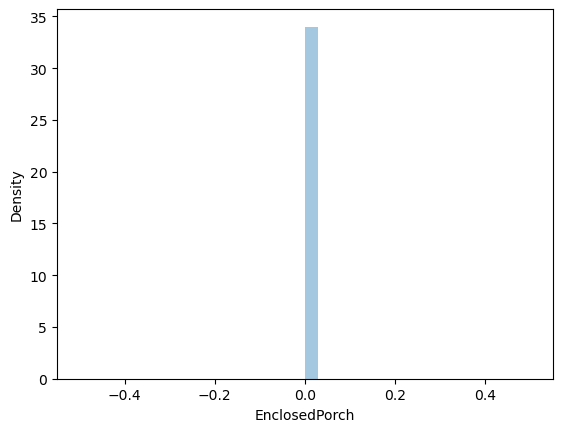

3SsnPorch
0.0


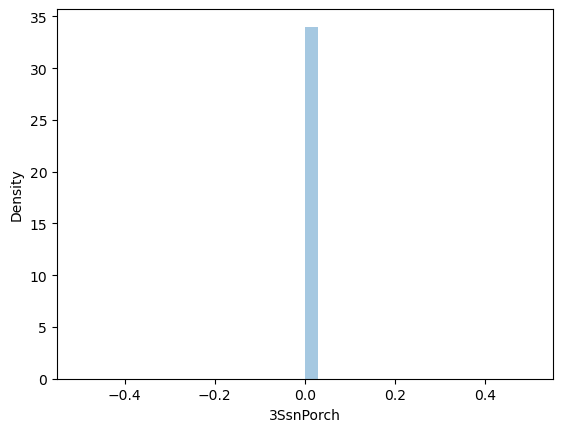

ScreenPorch
0.0


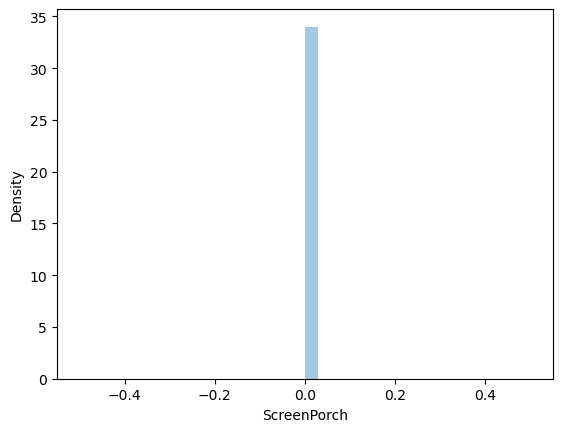

PoolArea
0.0


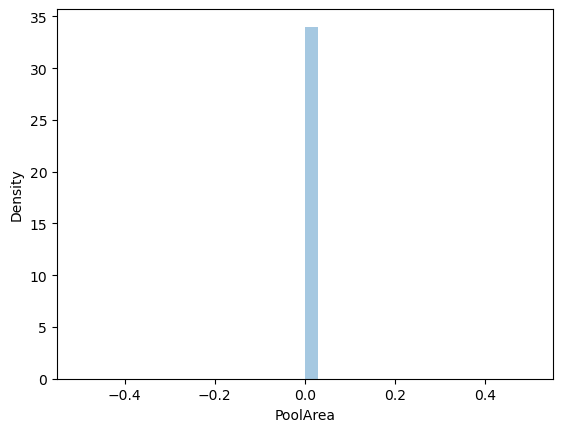

PoolQC
0.0


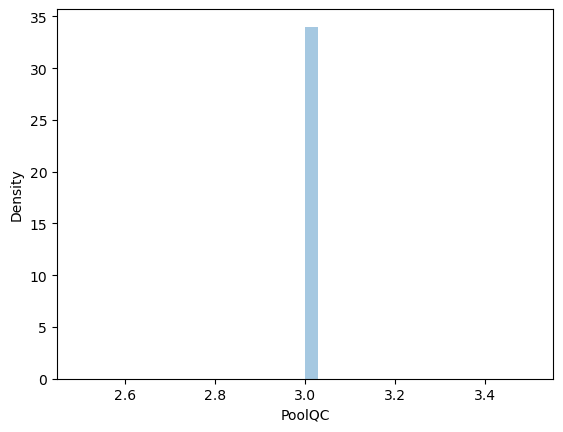

Fence
0.0


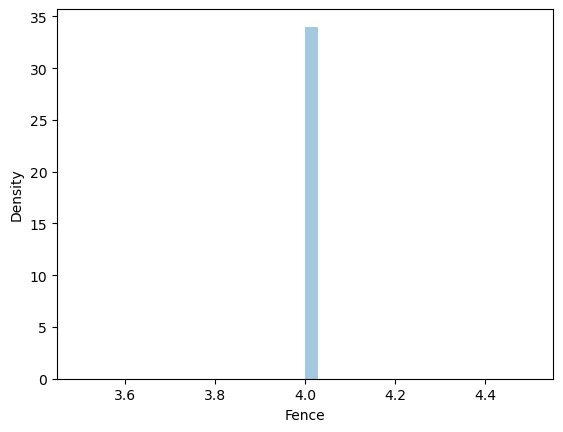

MiscFeature
0.0


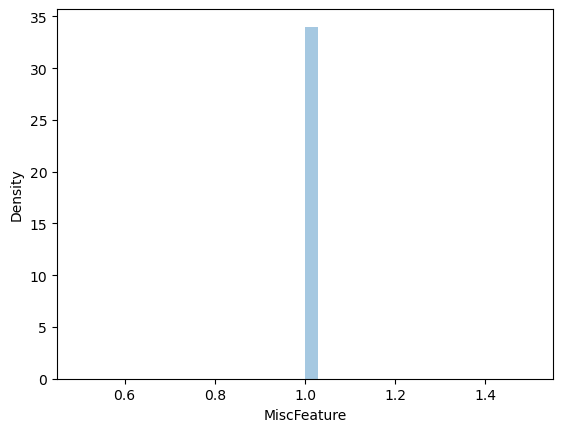

MiscVal
0.0


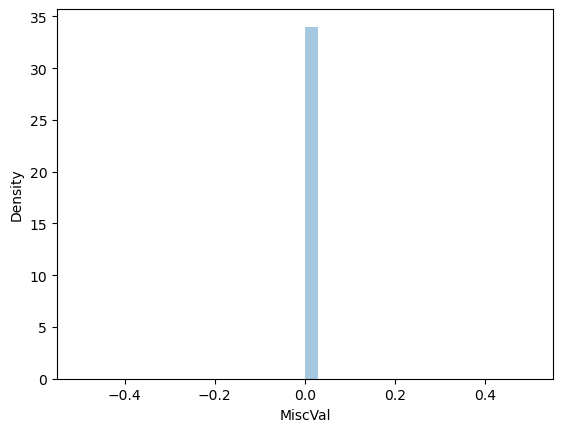

MoSold
0.22069473912487753


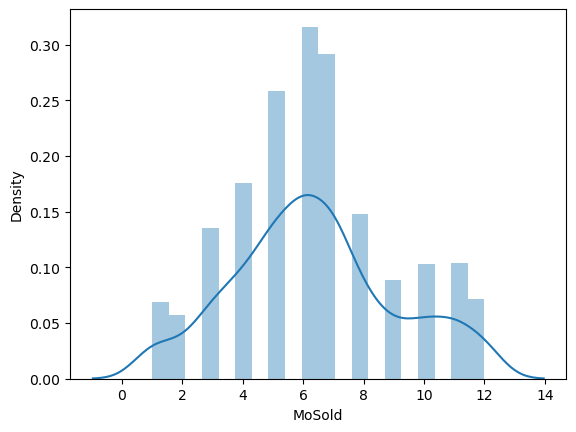

YrSold
0.11561598836544142


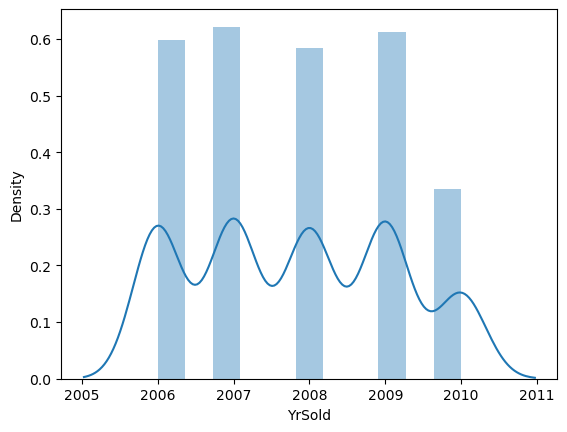

SaleType
0.0


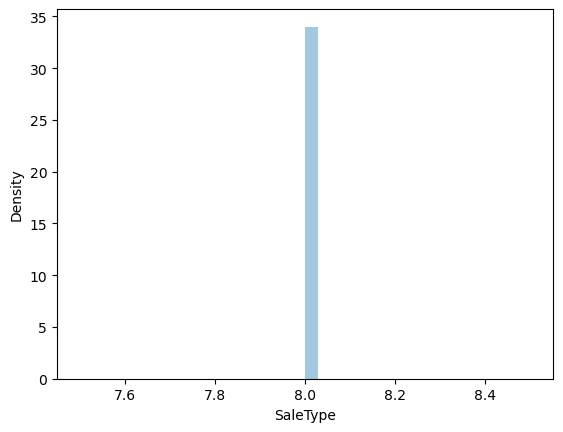

SaleCondition
0.0


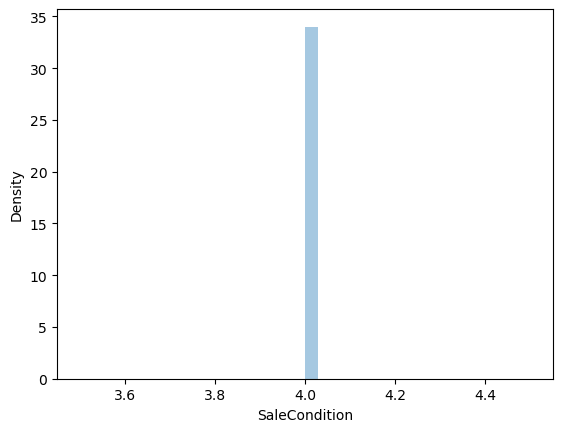

SalePrice
0.6920235847256223


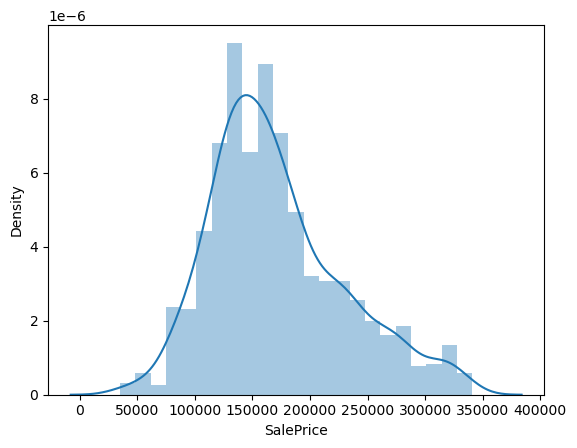

In [48]:
# Skewness using distplot

from scipy.stats import skew
print(df.skew())
for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [49]:
df.shape

(1168, 80)

### 

#### Spliting data into Feature and Target variable:

In [51]:
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [52]:
x.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                         
127       120.0       3.0          0.0   4928.0     1.0    1.0       0.0   
889        20.0       3.0         95.0  15865.0     1.0    1.0       0.0   
793        60.0       3.0         92.0   9920.0     1.0    1.0       0.0   
110        20.0       3.0        105.0  11751.0     1.0    1.0       0.0   
422        20.0       3.0          0.0  16635.0     1.0    1.0       0.0   

     LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
Id                                      ...                                  
127          3.0        0.0        4.0  ...          0.0       0.0     3.0   
889          3.0        0.0        4.0  ...          0.0       0.0     3.0   
793          3.0        0.0        1.0  ...          0.0       0.0     3.0   
110          3.0        0.0        4.0  ...          0.0       0.0     3.0   
422          3.0        0.0        2.0  ...          0.0       0.0     3.0   

     Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                         
127    4.0          1.0      0.0     2.0  2007.0       8.0            4.0  
889    4.0          1.0      0.0    10.0  2007.0       8.0            4.0  
793    4.0          1.0      0.0     6.0  2007.0       8.0            4.0  
110    4.0          1.0      0.0     1.0  2010.0       8.0            4.0  
422    4.0          1.0      0.0     6.0  2009.0       8.0            4.0  

[5 rows x 79 columns]

In [53]:
y.head()

Id
127    128000.0
889    268000.0
793    269790.0
110    190000.0
422    215000.0
Name: SalePrice, dtype: float64

In [54]:
x.shape

(1168, 79)

In [55]:
y.shape

(1168,)

### Feature Importance

In [56]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['Feature','Score'] #naming the dataframe columns
ficolumns = featurescores.nlargest(44,'Score')
ficolumns

Feature          Score
3        LotArea  609026.012005
43      2ndFlrSF  330619.731363
33    BsmtFinSF1  263234.492234
36     BsmtUnfSF  197183.993004
45     GrLivArea  108197.738196
25    MasVnrArea  103021.612804
65    WoodDeckSF   76296.607606
42      1stFlrSF   71902.164801
37   TotalBsmtSF   71398.909813
61    GarageArea   66550.228477
66   OpenPorchSF   37539.943378
2    LotFrontage   10382.598743
0     MSSubClass    9216.158805
11  Neighborhood    1869.539194
39     HeatingQC    1276.959175
57    GarageType     858.330229
23   Exterior2nd     706.134379
32  BsmtFinType1     677.968481
6       LotShape     657.369287
15    HouseStyle     628.190051
75        MoSold     586.965625
22   Exterior1st     510.454671
9      LotConfig     489.678971
55    Fireplaces     452.800185
49      HalfBath     413.043438
59  GarageFinish     401.969828
46  BsmtFullBath     361.087288
18     YearBuilt     330.799504
16   OverallQual     286.368600
60    GarageCars     245.415578
28    Foundation     234.497748
53  TotRmsAbvGrd     213.934303
58   GarageYrBlt     209.872413
19  YearRemodAdd     159.136873
48      FullBath     151.136877
24    MasVnrType     114.445650
50  BedroomAbvGr     101.506706
52   KitchenQual      80.704603
31  BsmtExposure      78.826953
29      BsmtQual      75.373559
26     ExterQual      71.056433
17   OverallCond      62.340517
56   FireplaceQu      58.596235
76        YrSold       0.484220

In [57]:
# Getting the best features for the model

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

# Filtering out the selected features for model.
filtered_features = [i[0] for i in sorted([[list(df.columns)[x], i] for x, i in enumerate(list(bestfeatures.scores_)) if i > 0.05], key = lambda x: x[1], reverse=True)]
print(filtered_features)

['LotArea', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'MasVnrArea', 'WoodDeckSF', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'OpenPorchSF', 'LotFrontage', 'MSSubClass', 'Neighborhood', 'HeatingQC', 'GarageType', 'Exterior2nd', 'BsmtFinType1', 'LotShape', 'HouseStyle', 'MoSold', 'Exterior1st', 'LotConfig', 'Fireplaces', 'HalfBath', 'GarageFinish', 'BsmtFullBath', 'YearBuilt', 'OverallQual', 'GarageCars', 'Foundation', 'TotRmsAbvGrd', 'GarageYrBlt', 'YearRemodAdd', 'FullBath', 'MasVnrType', 'BedroomAbvGr', 'KitchenQual', 'BsmtExposure', 'BsmtQual', 'ExterQual', 'OverallCond', 'FireplaceQu', 'YrSold']


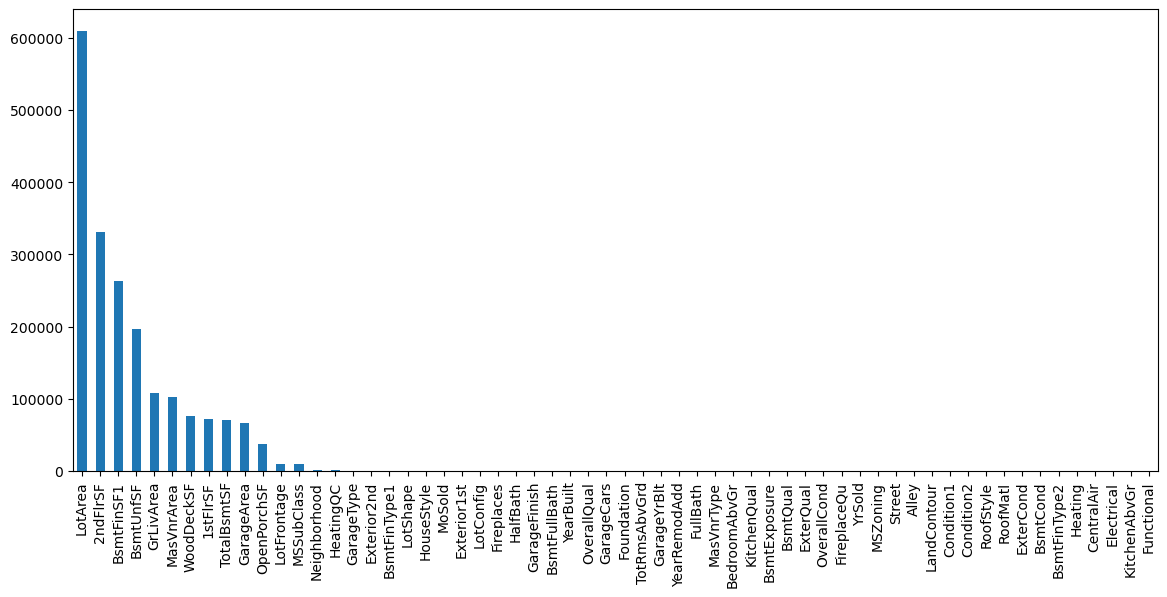

In [58]:
plt.figure(figsize=(14,6))
feat_importances = pd.Series(bestfeatures.scores_, index=x.columns)
feat_importances.nlargest(60).plot(kind='bar')
plt.show()

In [59]:
x = x[filtered_features].copy()

In [60]:
x.shape

(1168, 44)

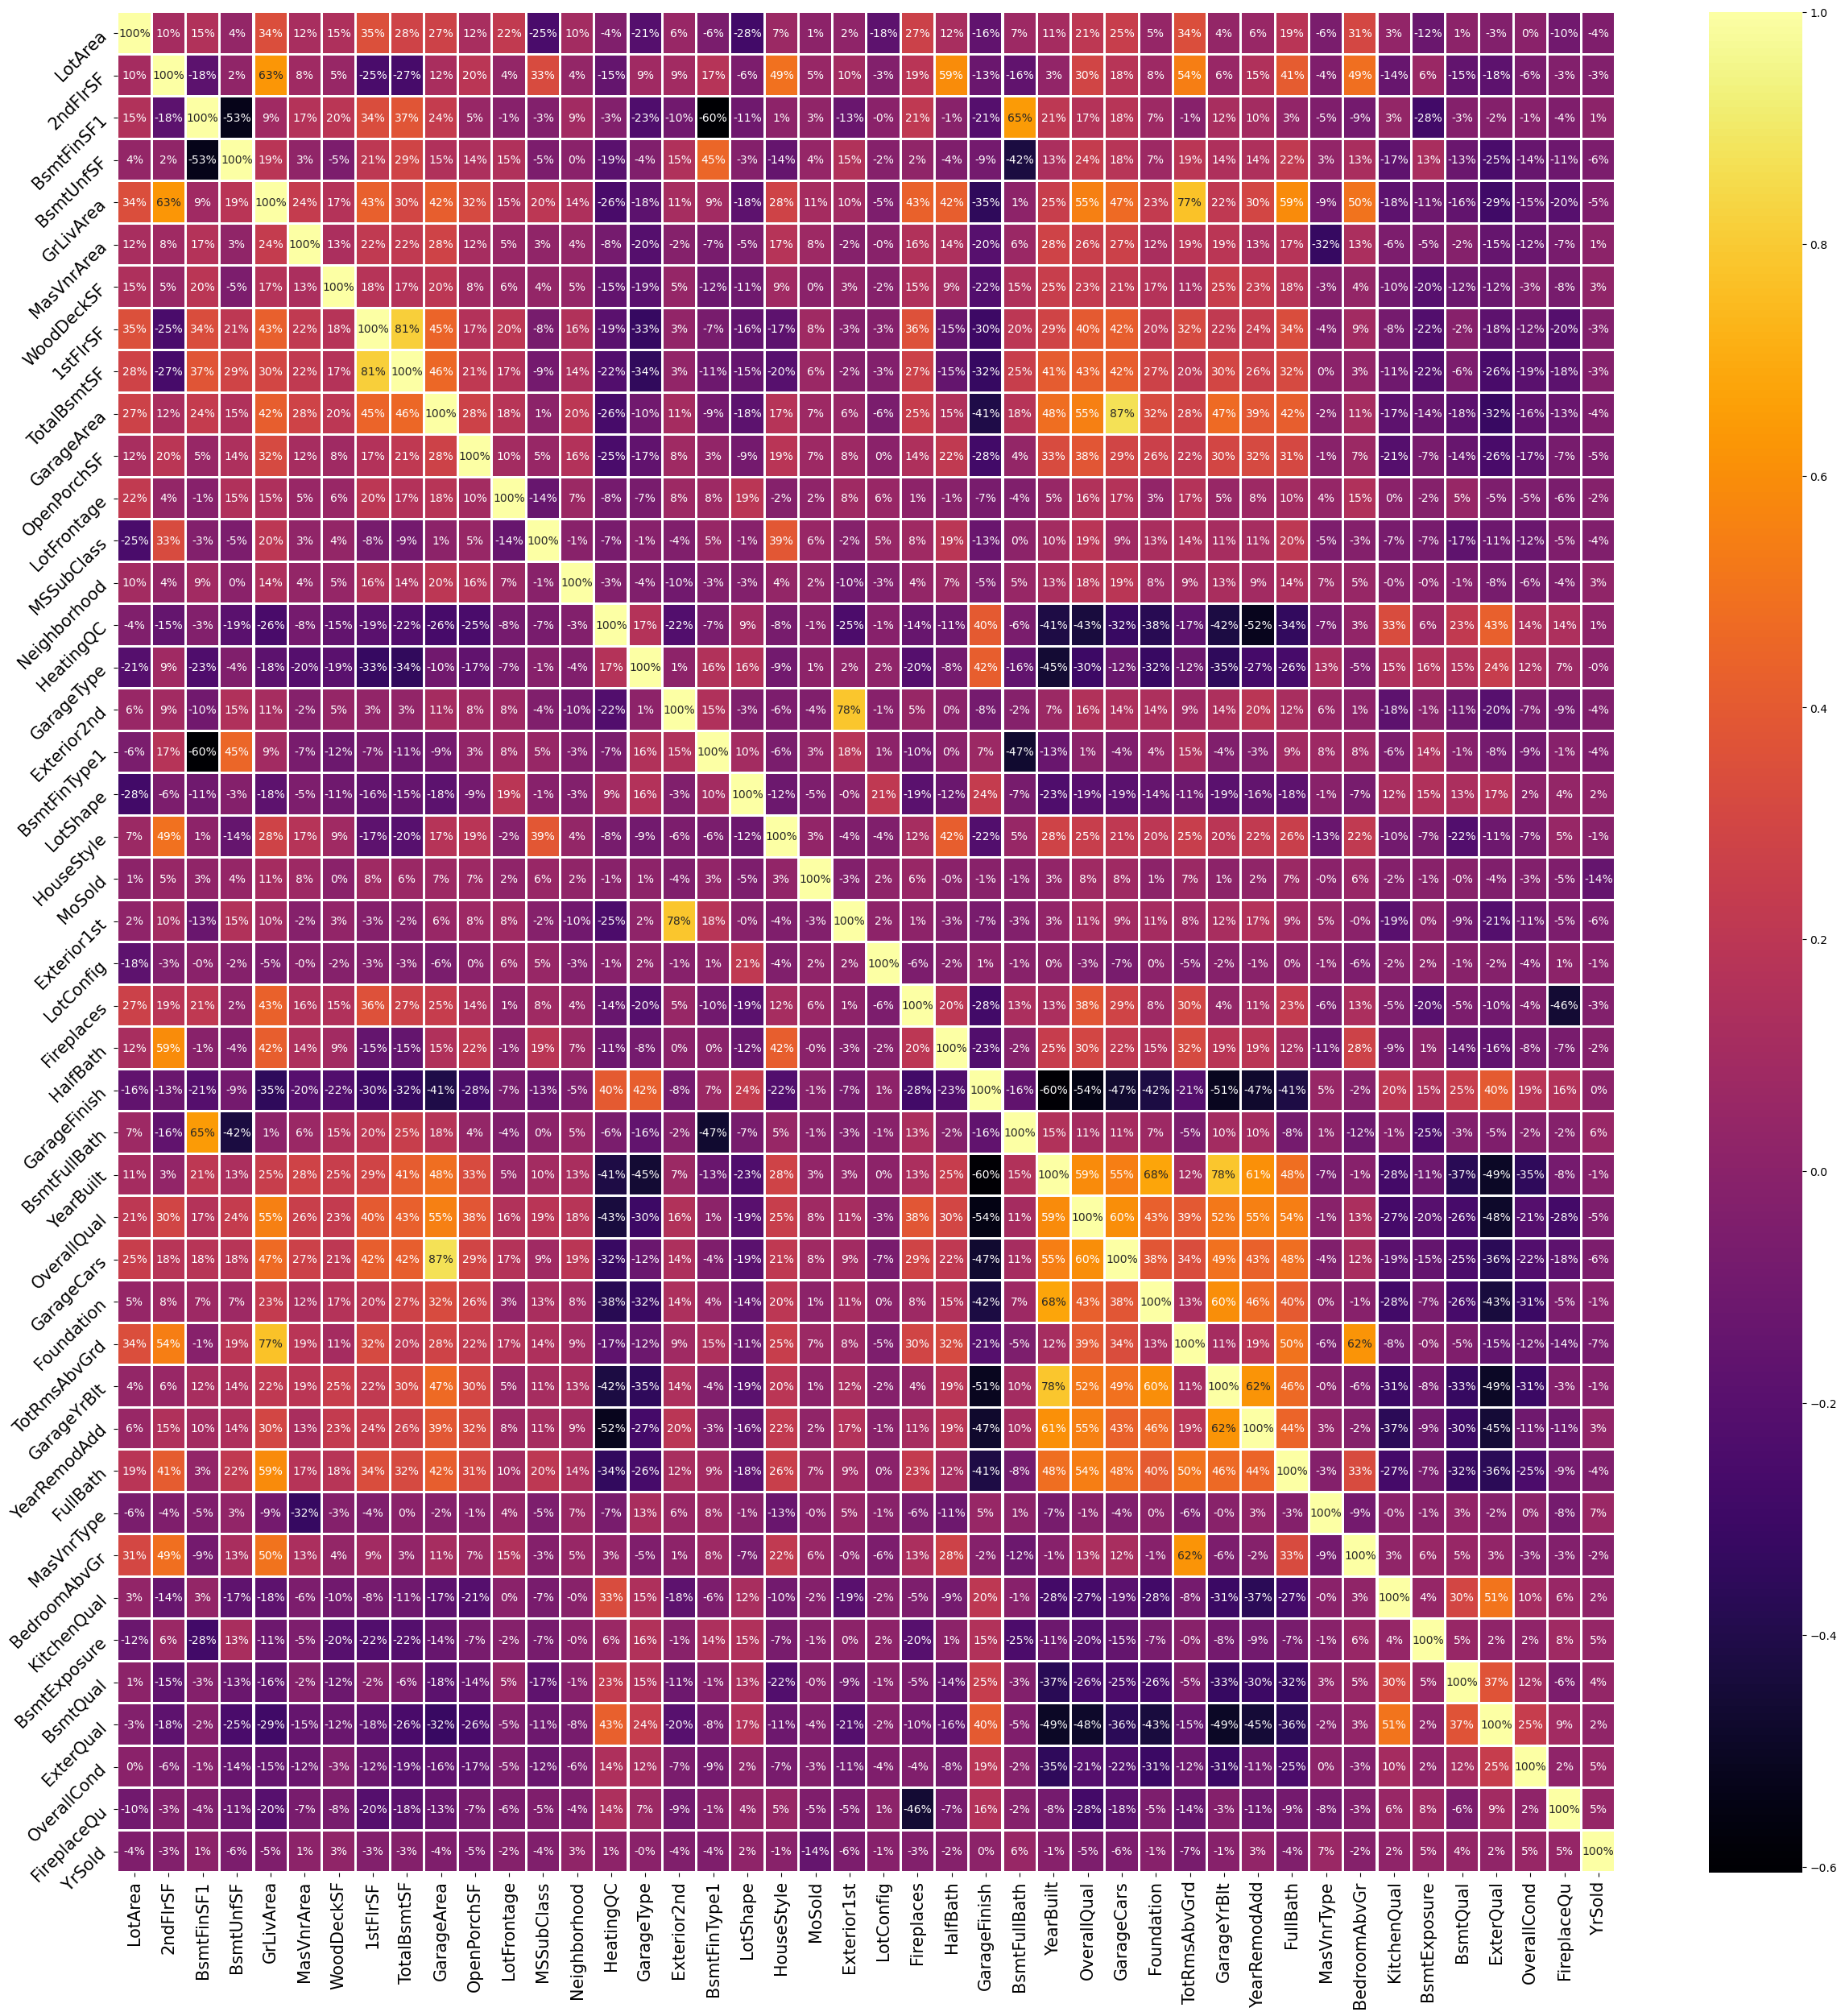

In [61]:
# Correlation among each feature using heatmap
plt.figure(figsize=(30,30))
p = sns.heatmap(x.corr(), annot=True, lw=1.5, fmt='.0%', cmap='inferno')
xlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':15}, rotation=90)
ylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':15}, rotation=45)

### Working with Test Dataset

In [62]:
df_test=df_test.set_index('Id')
df_test.shape

#Printing the numeric columns and categorical columns with their unique values
print('Columns with unique values of datatype object')
for column in df_test.columns:
    if df_test[column].dtypes == 'object':
        print(str(column)+ ' : ' +str(df_test[column].nunique()))
print('\n')        
print('Columns with unique values of datatype Float64')
for column in df_test.columns:
    if df_test[column].dtypes == 'float64':
        print(str(column)+ ' : ' +str(df_test[column].nunique()))
print('\n')
print('Columns with unique values of datatype Int64')
for column in df_test.columns:
    if df_test[column].dtypes == 'int64':
        print(str(column)+ ' : ' +str(df_test[column].nunique()))
        
        
# Displaying the columns having null values
null_values=df_test.isnull().sum()
null_values=null_values[null_values>0]
null_values

# Displaying the columns having null values in percentage format
null_percent = null_values * 100 / df_test.shape[0]
# Concatenating the number and perecentage of missing values into one dataframe and sorting it in Descending order
pd.concat([null_values,null_percent], axis=1,keys=['Null Values', 'Null Percentage']).sort_values(by="Null Values", ascending=False)

df_test["PoolQC"].fillna("No Pool", inplace=True)

# Replacing null values in MiscFeature with No Feature
df_test['MiscFeature'].fillna('No feature', inplace=True)

df_test['Alley'].fillna('No Alley', inplace=True)
df_test['Fence'].fillna('No Fence', inplace=True)
df_test['FireplaceQu'].fillna('No Fireplace', inplace=True)

df_test['LotFrontage'].fillna(0, inplace=True)

# Replacing null values of numerical values with their mean of the respective columns
for column in df_test.columns:
    if df_test[column].dtypes == 'float64':
            df_test[column]=df_test[column].fillna(df_test[column].mean())
            
            
# Replacing null values of object datatypes their mode of the respective columns
for column in df_test.columns:
    if df_test[column].dtypes == 'object':
        df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        
df_test.isnull().sum().any()
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df_test.columns:
    if df_test[column].dtypes == 'object':
        label_encoders[column] = LabelEncoder()
        df_test[column] = label_encoders[column].fit_transform(df_test[column])
for col in df_test.columns:
    IQR = df_test[col].quantile(0.75)-df_test[col].quantile(0.25)
    upper_bridge = df_test[col].quantile(0.75)+(IQR*1.5)
    lower_bridge = df_test[col].quantile(0.25)-(IQR*1.5)
    df_test.loc[df_test[col]>=upper_bridge, col]=upper_bridge
    df_test.loc[df_test[col]<=lower_bridge, col]=lower_bridge
    
df_test.head(5)
df_test = df_test[filtered_features].copy()
df_test.shape

Columns with unique values of datatype object
MSZoning : 4
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 24
Condition1 : 8
Condition2 : 2
BldgType : 5
HouseStyle : 8
RoofStyle : 5
RoofMatl : 3
Exterior1st : 12
Exterior2nd : 14
MasVnrType : 4
ExterQual : 4
ExterCond : 4
Foundation : 6
BsmtQual : 4
BsmtCond : 3
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 4
HeatingQC : 4
CentralAir : 2
Electrical : 4
KitchenQual : 4
Functional : 6
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
Fence : 4
MiscFeature : 2
SaleType : 6
SaleCondition : 4


Columns with unique values of datatype Float64
LotFrontage : 65
MasVnrArea : 104
GarageYrBlt : 71
PoolQC : 0


Columns with unique values of datatype Int64
MSSubClass : 15
LotArea : 249
OverallQual : 8
OverallCond : 7
YearBuilt : 84
YearRemodAdd : 57
BsmtFinSF1 : 184
BsmtFinSF2 : 32
BsmtUnfSF : 231
TotalBsmtSF : 224
1stFlrSF : 238
2ndFl

(292, 44)

### Training the Model

In [63]:
x.shape

(1168, 44)

In [64]:
y.shape

(1168,)

#### Scalling:

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.50056078, -0.79492515, -0.73976495, ..., -0.5571791 ,
         0.54126453, -0.60548713],
       [ 2.22608259, -0.79492515, -0.19169792, ...,  0.71887028,
         0.54126453, -0.60548713],
       [ 0.2003996 ,  1.24384316,  1.02069277, ..., -0.5571791 ,
         0.54126453, -0.60548713],
       ...,
       [-2.40283304,  0.58803168,  0.31840775, ...,  0.71887028,
         0.54126453,  0.8992128 ],
       [-0.2834473 ,  0.74220491, -1.02447509, ..., -1.83322848,
         0.54126453,  0.14686284],
       [-0.50117841,  0.82044206,  0.05979604, ..., -0.5571791 ,
        -1.35722488, -1.3578371 ]])

In [66]:
#Importing required library

from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [67]:
# Getting the best Random State value with R2 score

from sklearn.model_selection import train_test_split
model_r = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model_r:
    max_r_score=0
    for r_state in range (42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        m.fit(x_train,y_train)
        y_pred=m.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 scoring corresponding to',m,final_r_state,'is',max_r_score)

max r2 scoring corresponding to LinearRegression() 56 is 0.7821752759405631
max r2 scoring corresponding to Lasso() 56 is 0.7821590631267854
max r2 scoring corresponding to Ridge() 56 is 0.782134356778311
max r2 scoring corresponding to DecisionTreeRegressor() 62 is 0.7055819901647828
max r2 scoring corresponding to RandomForestRegressor() 62 is 0.8166562572320405
max r2 scoring corresponding to GradientBoostingRegressor() 72 is 0.8364943254648449


### Finding Best Parameters Using GridSearchCV

In [68]:
model_params = {
    
    'LinearRegression':{
        'model':LinearRegression(),
        'params': {
            'fit_intercept':['True','False'],
            'n_jobs':[1,2,3,4]
        }   
    },
    
    'Lasso':{
        'model':Lasso(),
        'params': {
            'alpha':[1.0,2.0,3.0,4.0,5.0],
            'selection':['cyclic','random']
        }   
    },
    
     'Ridge' : {
        'model': Ridge(),
        'params': {
            'max_iter': [1,2,3,4],
            'solver':['auto','svd','sag','cholesky']
        }
    },
    
        'Decision Tree Regressor': {
        'model':DecisionTreeRegressor(),
        'params':{
           'criterion':['mse','mae','poisson'],
            'splitter':['best','random']
       }
    },
                       
        'random Forest Regressor': {
        'model': RandomForestRegressor(),
        'params' : {
            'criterion':['mse','mae'],
            'n_estimators': [50,70,100,120]
        }
    },
    
    
        'Gradient Boosting Regressor':{
        'model':GradientBoostingRegressor(),
        'params':{
            'criterion':['mse','mae','friedman_mse'],
            'n_estimators': [50,70,100,120]
        }
    }
}

In [69]:
scores = []
from sklearn.model_selection import GridSearchCV,cross_val_score
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5,scoring="r2", return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [72]:
# Making a dataframe for the best value model, best_score & best_parameters
best_df= pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_df

model  best_score  \
0             LinearRegression    0.702125   
1                        Lasso    0.702183   
2                        Ridge    0.702223   
3      Decision Tree Regressor    0.498620   
4      random Forest Regressor    0.751544   
5  Gradient Boosting Regressor    0.748493   

                                  best_params  
0      {'fit_intercept': 'True', 'n_jobs': 1}  
1       {'alpha': 5.0, 'selection': 'cyclic'}  
2            {'max_iter': 1, 'solver': 'svd'}  
3  {'criterion': 'mae', 'splitter': 'random'}  
4    {'criterion': 'mae', 'n_estimators': 70}  
5   {'criterion': 'mae', 'n_estimators': 120}

In [73]:
# Passing the obtained best fit parameters into the model
lnr = LinearRegression(fit_intercept=True,n_jobs=1)
ls = Lasso(alpha=5.0,selection='cyclic')
rdg = Ridge(max_iter= 1, solver='auto')
dtr = DecisionTreeRegressor(criterion='mse',splitter='best')
rfr = RandomForestRegressor(criterion='mae',n_estimators=70)
gbr = GradientBoostingRegressor(criterion='mae',n_estimators=100)

In [74]:
#Using algorithms via loop
model = [lnr,ls,rdg,dtr,rfr,gbr]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    
    Mean_absolute_error=mean_absolute_error(y_test,predm)
    print('Mean absolute error:', Mean_absolute_error)
    meansquarederror=mean_squared_error(y_test, predm)
    print('Mean squared error:', meansquarederror)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test, predm))
    print('Root Mean Squared Error:',root_mean_squared_error)
    R2_score=r2_score(y_test, predm)
    print('r2_score:',R2_score)
    Cross_Validation_Score=cross_val_score(m,x,y,cv=4,scoring='r2').mean()
    print('Cross Validation Score:',Cross_Validation_Score)
    print('\n--- -:- ----- --:-- ----- --:-- ----- --:-- ----- --:-- ----- --:-- ----- --:-- --- \n')

score of LinearRegression(n_jobs=1) is: 0.7312981450400451
Error:
Mean absolute error: 22895.82762845471
Mean squared error: 1098143993.4096744
Root Mean Squared Error: 33138.255738793414
r2_score: 0.7245871389963043
Cross Validation Score: 0.6961236977384623

--- -:- ----- --:-- ----- --:-- ----- --:-- ----- --:-- ----- --:-- ----- --:-- --- 

score of Lasso(alpha=5.0) is: 0.7312973820347134
Error:
Mean absolute error: 22887.33192964424
Mean squared error: 1098170530.5950317
Root Mean Squared Error: 33138.65613743309
r2_score: 0.7245804835101513
Cross Validation Score: 0.6963018643741454

--- -:- ----- --:-- ----- --:-- ----- --:-- ----- --:-- ----- --:-- ----- --:-- --- 

score of Ridge(max_iter=1) is: 0.7312973489626469
Error:
Mean absolute error: 22887.18228031719
Mean squared error: 1098118458.478414
Root Mean Squared Error: 33137.87045780724
r2_score: 0.7245935431186382
Cross Validation Score: 0.6963175740762482

--- -:- ----- --:-- ----- --:-- ----- --:-- ----- --:-- ----- --:--

#### Train Test Split the data:

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=62,test_size=0.20)

rfr.fit(x_train,y_train)
print('score of',rfr,'is:',rfr.score(x_train,y_train))
predrfr=rfr.predict(x_test)
print('Mean absolute error:', mean_absolute_error(y_test,predrfr))
print('Mean squared error:', mean_squared_error(y_test, predrfr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predrfr)))
print('r2_score:',r2_score(y_test, predrfr))

score of RandomForestRegressor(criterion='mae', n_estimators=70) is: 0.9611349760660248
Mean absolute error: 18533.018192918193
Mean squared error: 807888879.8452312
Root Mean Squared Error: 28423.386143196083
r2_score: 0.7955304745684761


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=0.20)

gbr.fit(x_train,y_train)
print('score of',gbr,'is:',gbr.score(x_train,y_train))
predgbr=gbr.predict(x_test)
print('Mean absolute error:', mean_absolute_error(y_test,predgbr))
print('Mean squared error:', mean_squared_error(y_test, predgbr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predgbr)))
print('r2_score:',r2_score(y_test, predgbr))

score of GradientBoostingRegressor(criterion='mae') is: 0.8980675052844312
Mean absolute error: 15125.516022488813
Mean squared error: 474965515.71526
Root Mean Squared Error: 21793.703579595185
r2_score: 0.8407726608897461


In [77]:
# Making predictions on test set splitted from train dataset
pred=gbr.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [149190.66375986 128740.5754663   77317.74792998 158821.28058124
 140178.20479188 194499.39820127 122375.46816183 123857.01896334
 128103.27762322 163760.02571295 134995.33051082 166191.61473757
 151186.86448545 250250.67411094 126147.45552933 128505.6101041
 180908.53241732 178717.21762886 137429.80051452 176221.44756996
  87040.34600966  86657.46168693 188951.00141307 145215.99868646
 150802.96692973 263912.96873163 191965.2026099  143051.37720469
 245002.91766045 199832.46037638 157621.11992846 166512.73244234
 154826.06026731 124104.97210869 251914.8598479  181436.43705639
 271166.81063403 138926.56739401 169253.06788121 145712.32120104
 141933.88298121 177233.87654144 249410.69919975 132671.97366018
 207584.38128217 148017.60744473 182861.54562414 232569.56983253
 187565.16272342 106772.48193191 222140.29030455 193648.42955425
 133277.91570844 158132.90034702 151215.2680376  135220.89161509
 247699.55603168 122418.22504735 153476.65186972 228055.71921936
 118379.

In [78]:
# Making predictions on test dataset
gbr.predict(df_test)

array([204035.79482463, 192322.83445885, 194076.96659084, 207612.8486183 ,
       181222.3076001 , 248852.52548756, 185841.76810361, 184923.84720178,
       175399.30592687, 185841.76810361, 238421.26958738, 179230.42818029,
       221772.50912361, 195720.7765985 , 214584.36734042, 165801.23804728,
       217233.98913816, 208371.72952573, 159685.6989704 , 186480.35167786,
       205423.49752064, 227717.00240293, 155971.73760877, 229330.60121934,
       195308.20963996, 221318.28422801, 184319.77465752, 189192.67056308,
       163926.63895684, 211334.3017933 , 193712.56872866, 185841.76810361,
       215987.32327053, 214423.89981822, 238421.26958738, 231555.21266164,
       183128.44370715, 230942.39766914, 158323.07706281, 220559.40332058,
       210124.06742173, 159685.6989704 , 169756.86718726, 189262.87944829,
       211316.90512749, 209716.48981632, 226267.75125095, 223876.15032162,
       204035.79482463, 204035.79482463, 168946.31486499, 181503.54896094,
       217010.09339589, 2

<Figure size 1000x800 with 0 Axes>

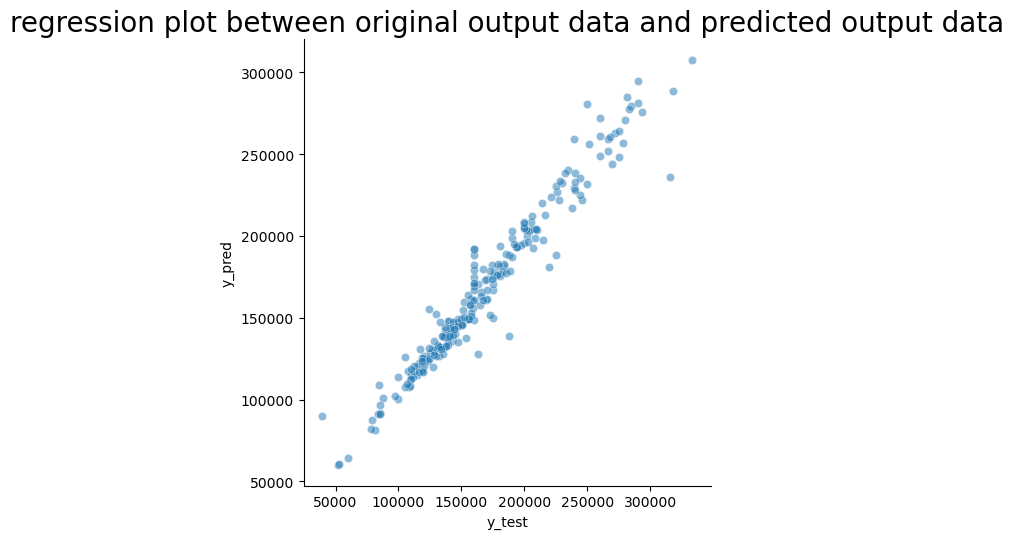

In [79]:
plt.figure(figsize=(10,8))
sns.relplot(y_test, rfr.predict(x_test), alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("regression plot between original output data and predicted output data",fontsize=20)
plt.show();

### Saving the model

In [80]:
#importing joblib
import joblib

#saving the model in a pickle file
joblib.dump(gbr,'PFA_Housing.pkl')

['PFA_Housing.pkl']

                                                   ----- ---:--- -----       